# Descriptive Statistics & Data Visualization

This notebook provides an in-depth statistical analysis and visual exploration of a medical dataset. The primary goal is to derive meaningful insights into the data's characteristics, identify patterns, and understand relationships between various features, particularly in the context of disease diagnosis. We will utilize fundamental descriptive statistics and a range of data visualization techniques to achieve this.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# Setting visual aesthetics for plots
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (14, 9) # Adjusted figure size for better visibility
plt.rcParams['font.size'] = 13 # Slightly increased font size

## Data Acquisition and Initial Overview

We will load the Wisconsin Breast Cancer Dataset, a well-known dataset for classification tasks. It contains various features computed from digitized images of breast mass. We'll inspect the initial rows and general information to get a first glance at its structure and data types.

In [2]:
# URL for the dataset
dataset_url = "https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/wdbc.data"

# Defining column headers for clarity
data_attributes = ['Sample_ID', 'Disease_Diagnosis'] + [
    'Mean_Radius', 'Mean_Texture', 'Mean_Perimeter', 'Mean_Area',
    'Mean_Smoothness', 'Mean_Compactness', 'Mean_Concavity', 'Mean_Concave_Points',
    'Mean_Symmetry', 'Mean_Fractal_Dimension',
    'SE_Radius', 'SE_Texture', 'SE_Perimeter', 'SE_Area',
    'SE_Smoothness', 'SE_Compactness', 'SE_Concavity', 'SE_Concave_Points',
    'SE_Symmetry', 'SE_Fractal_Dimension',
    'Worst_Radius', 'Worst_Texture', 'Worst_Perimeter', 'Worst_Area',
    'Worst_Smoothness', 'Worst_Compactness', 'Worst_Concavity', 'Worst_Concave_Points',
    'Worst_Symmetry', 'Worst_Fractal_Dimension'
]

# Loading the dataset into a Pandas DataFrame
medical_data = pd.read_csv(dataset_url, names=data_attributes, na_values='?')

# Displaying the initial entries of the DataFrame
print("\nInitial 5 rows of the dataset:")
print(medical_data.head())

# Presenting summary information about the DataFrame
print("\nDetailed Dataset Information:")
medical_data.info()


Initial 5 rows of the dataset:
   Sample_ID Disease_Diagnosis  Mean_Radius  Mean_Texture  Mean_Perimeter  \
0     842302                 M        17.99         10.38          122.80   
1     842517                 M        20.57         17.77          132.90   
2   84300903                 M        19.69         21.25          130.00   
3   84348301                 M        11.42         20.38           77.58   
4   84358402                 M        20.29         14.34          135.10   

   Mean_Area  Mean_Smoothness  Mean_Compactness  Mean_Concavity  \
0     1001.0          0.11840           0.27760          0.3001   
1     1326.0          0.08474           0.07864          0.0869   
2     1203.0          0.10960           0.15990          0.1974   
3      386.1          0.14250           0.28390          0.2414   
4     1297.0          0.10030           0.13280          0.1980   

   Mean_Concave_Points  ...  Worst_Radius  Worst_Texture  Worst_Perimeter  \
0              0.14710  .

## Missing Value Assessment

It's crucial to identify and understand any missing data points, as they can significantly impact analysis and model performance. We'll check for null values across all columns.

In [3]:
print("\nSum of missing values per column:")
print(medical_data.isnull().sum())


Sum of missing values per column:
Sample_ID                  0
Disease_Diagnosis          0
Mean_Radius                0
Mean_Texture               0
Mean_Perimeter             0
Mean_Area                  0
Mean_Smoothness            0
Mean_Compactness           0
Mean_Concavity             0
Mean_Concave_Points        0
Mean_Symmetry              0
Mean_Fractal_Dimension     0
SE_Radius                  0
SE_Texture                 0
SE_Perimeter               0
SE_Area                    0
SE_Smoothness              0
SE_Compactness             0
SE_Concavity               0
SE_Concave_Points          0
SE_Symmetry                0
SE_Fractal_Dimension       0
Worst_Radius               0
Worst_Texture              0
Worst_Perimeter            0
Worst_Area                 0
Worst_Smoothness           0
Worst_Compactness          0
Worst_Concavity            0
Worst_Concave_Points       0
Worst_Symmetry             0
Worst_Fractal_Dimension    0
dtype: int64


## Central Tendency Measures: Locating the 'Middle' of the Data

Central tendency measures help us understand the typical or central value of a distribution. We'll calculate the mean, median, mode, and a weighted mean for a selection of key features, along with their visual representation and interpretation.


Statistical Summary for Mean_Radius:
  Arithmetic Mean: 14.1273
  Median: 13.3700
  Mode: 12.3400
  Weighted Mean: 15.9938


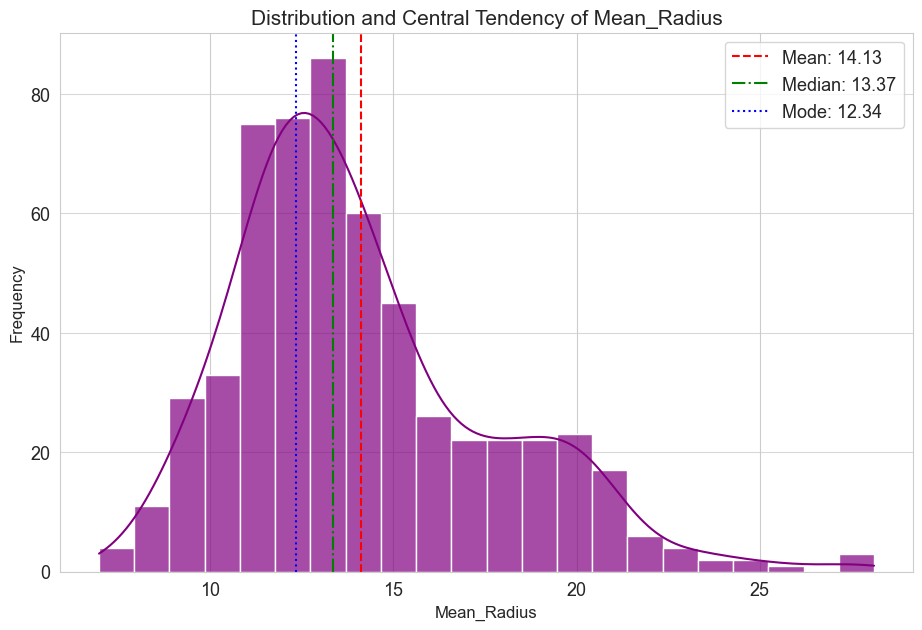


Interpretation:
  The mean exceeds the median, suggesting a right-skewed (positive skew) distribution.
  This implies the presence of larger values that pull the mean upwards.

----------------------------------------------------------------------


Statistical Summary for Mean_Texture:
  Arithmetic Mean: 19.2896
  Median: 18.8400
  Mode: 14.9300
  Weighted Mean: 19.6364


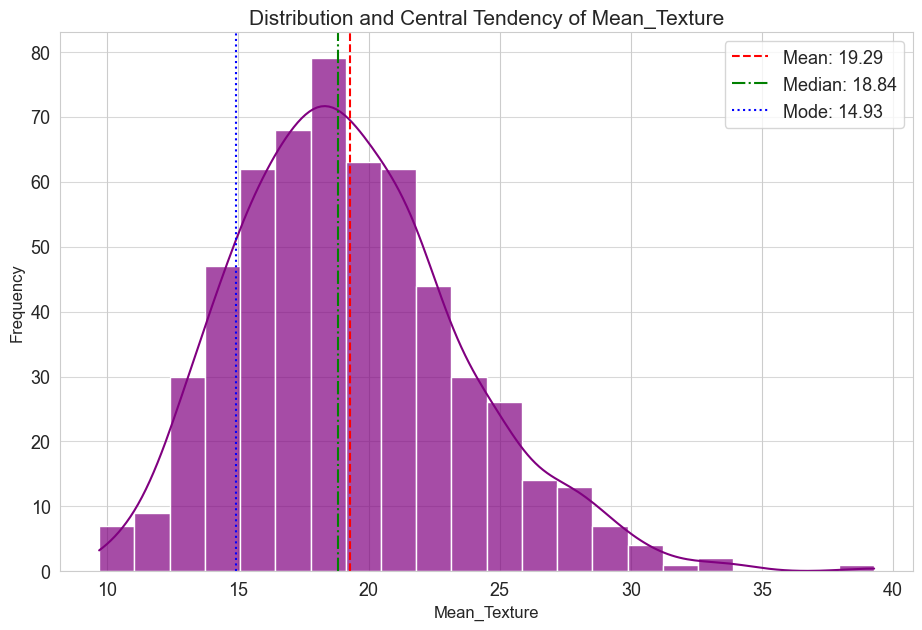


Interpretation:
  The mean exceeds the median, suggesting a right-skewed (positive skew) distribution.
  This implies the presence of larger values that pull the mean upwards.

----------------------------------------------------------------------


Statistical Summary for Mean_Perimeter:
  Arithmetic Mean: 91.9690
  Median: 86.2400
  Mode: 82.6100
  Weighted Mean: 98.0068


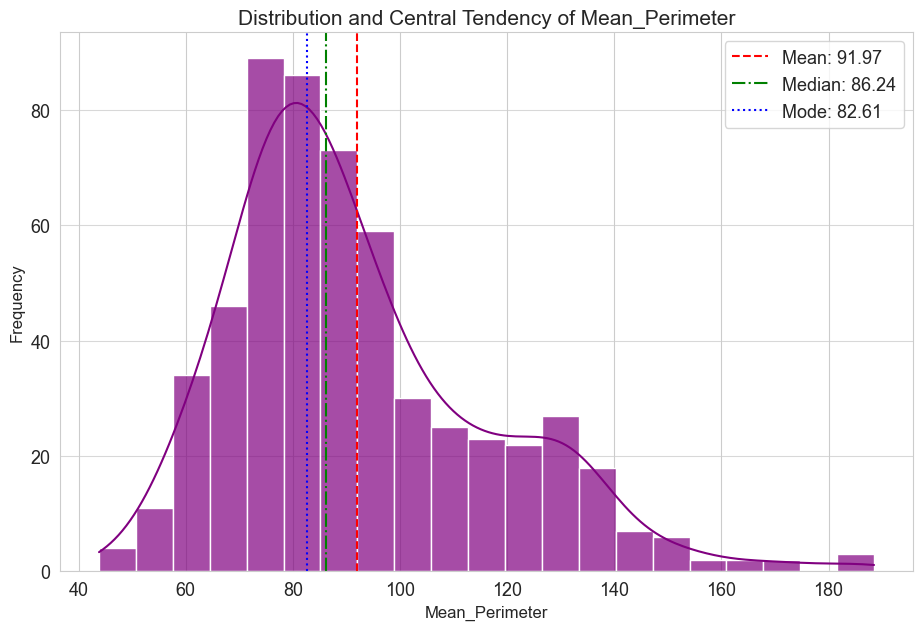


Interpretation:
  The mean exceeds the median, suggesting a right-skewed (positive skew) distribution.
  This implies the presence of larger values that pull the mean upwards.

----------------------------------------------------------------------


Statistical Summary for Mean_Area:
  Arithmetic Mean: 654.8891
  Median: 551.1000
  Mode: 512.2000
  Weighted Mean: 741.4118


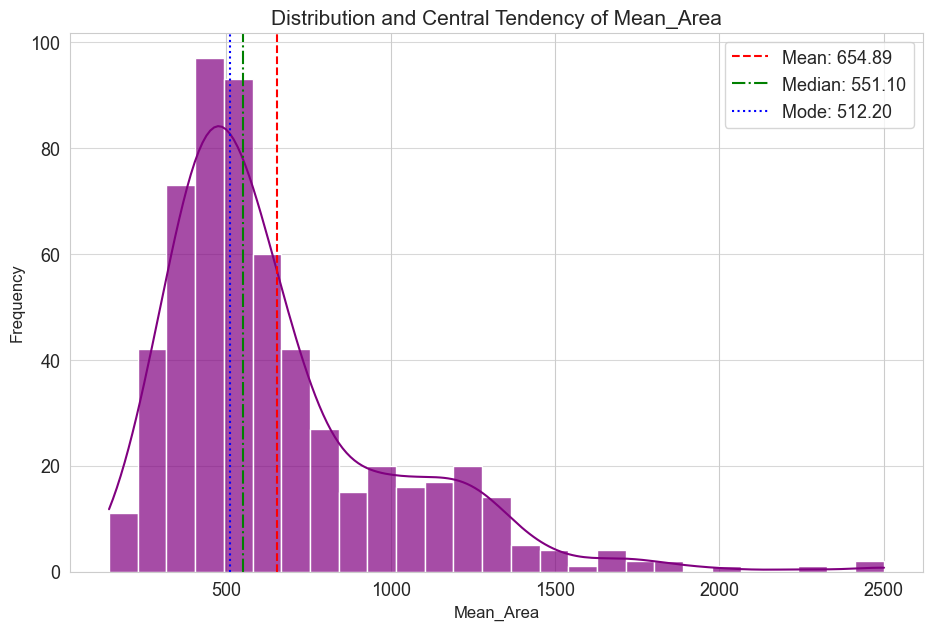


Interpretation:
  The mean exceeds the median, suggesting a right-skewed (positive skew) distribution.
  This implies the presence of larger values that pull the mean upwards.

----------------------------------------------------------------------


Statistical Summary for Mean_Smoothness:
  Arithmetic Mean: 0.0964
  Median: 0.0959
  Mode: 0.1007
  Weighted Mean: 0.0970


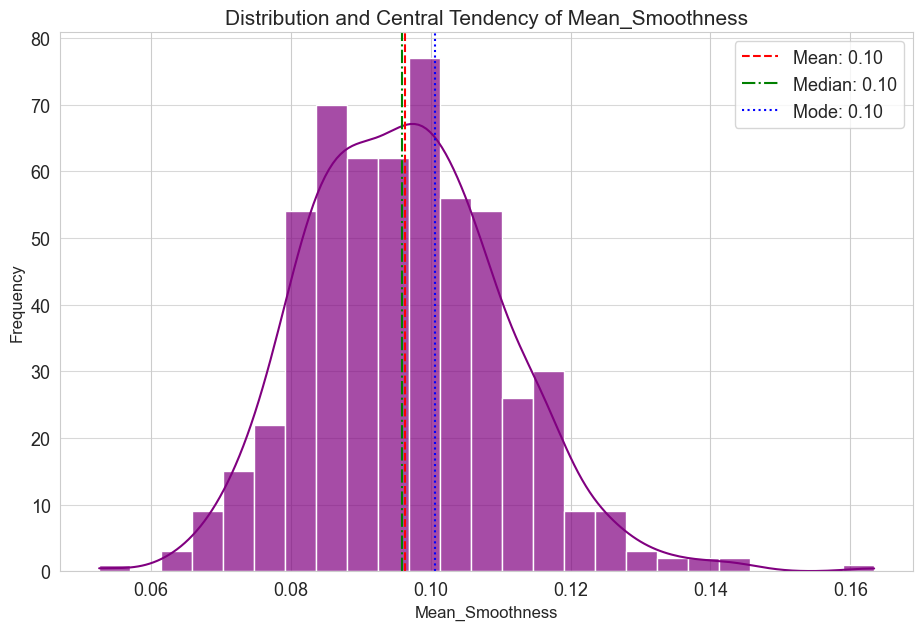


Interpretation:
  The mean and median are closely aligned, indicative of a relatively symmetric data distribution.

----------------------------------------------------------------------



In [4]:
# Selecting a subset of numerical attributes for analysis
key_numerical_attributes = ['Mean_Radius', 'Mean_Texture', 'Mean_Perimeter', 'Mean_Area', 'Mean_Smoothness']

# Function to compute and visualize central tendency metrics
def analyze_central_tendency(dataset, attribute_name):
    """Calculates and visualizes central tendency measures for a given attribute."""
    data_series = dataset[attribute_name].dropna() # Drop NaNs for robust calculations

    if data_series.empty:
        print(f"Warning: No data available for {attribute_name} after dropping NaNs. Skipping analysis.")
        return

    # Calculating primary measures
    average_value = data_series.mean()
    midpoint_value = data_series.median()
    most_frequent_value = data_series.mode()[0] if not data_series.mode().empty else np.nan # Taking the first mode if multiple exist, handle empty

    # Example of weighted average: using 'Mean_Area' as weights for 'Mean_Radius' to demonstrate
    # For other attributes, 'Mean_Radius' is used as a weight.
    # Ensure weights align with data_series (i.e., drop NaNs from weights too)
    if attribute_name != 'Mean_Radius':
        # Align data_series and weighting_factors by index after dropping NaNs
        aligned_data = dataset[[attribute_name, 'Mean_Radius']].dropna()
        if not aligned_data.empty:
            data_series_for_weighted = aligned_data[attribute_name]
            weighting_factors = aligned_data['Mean_Radius']
            weighted_average = np.average(data_series_for_weighted, weights=weighting_factors)
        else:
            weighted_average = np.nan
    else:
        aligned_data = dataset[[attribute_name, 'Mean_Area']].dropna()
        if not aligned_data.empty:
            data_series_for_weighted = aligned_data[attribute_name]
            weighting_factors = aligned_data['Mean_Area']
            weighted_average = np.average(data_series_for_weighted, weights=weighting_factors)
        else:
            weighted_average = np.nan

    # Displaying calculated statistics
    print(f"\nStatistical Summary for {attribute_name}:")
    print(f"  Arithmetic Mean: {average_value:.4f}")
    print(f"  Median: {midpoint_value:.4f}")
    print(f"  Mode: {most_frequent_value:.4f}" if not np.isnan(most_frequent_value) else "  Mode: N/A")
    print(f"  Weighted Mean: {weighted_average:.4f}" if not np.isnan(weighted_average) else "  Weighted Mean: N/A")

    # Visualizing the distribution with central tendency markers
    plt.figure(figsize=(11, 7))
    sns.histplot(data_series, kde=True, color='purple', alpha=0.7)
    plt.axvline(average_value, color='red', linestyle='--', label=f'Mean: {average_value:.2f}')
    plt.axvline(midpoint_value, color='green', linestyle='-.', label=f'Median: {midpoint_value:.2f}')
    if not np.isnan(most_frequent_value):
        plt.axvline(most_frequent_value, color='blue', linestyle=':', label=f'Mode: {most_frequent_value:.2f}')
    plt.title(f'Distribution and Central Tendency of {attribute_name}', fontsize=15)
    plt.xlabel(attribute_name, fontsize=12)
    plt.ylabel('Frequency', fontsize=12)
    plt.legend()
    plt.grid(axis='y', alpha=0.75)
    plt.show()

    # Interpreting the results
    print("\nInterpretation:")
    if abs(average_value - midpoint_value) < 0.01 * abs(average_value):
        print("  The mean and median are closely aligned, indicative of a relatively symmetric data distribution.")
    elif average_value > midpoint_value:
        print("  The mean exceeds the median, suggesting a right-skewed (positive skew) distribution.")
        print("  This implies the presence of larger values that pull the mean upwards.")
    else:
        print("  The median is greater than the mean, pointing to a left-skewed (negative skew) distribution.")
        print("  This indicates some smaller values are drawing the mean downwards.")

    if not np.isnan(most_frequent_value) and abs(most_frequent_value - midpoint_value) < 0.01 * abs(midpoint_value):
        print("  The mode is near the median, which is commonly observed in many data distributions.")
    print("\n" + "-"*70 + "\n")

# Applying the analysis function to selected attributes
for attribute in key_numerical_attributes:
    analyze_central_tendency(medical_data, attribute)

## Comparative Analysis of Means by Diagnosis

To understand how different features vary between benign and malignant tumors, we will visualize the mean values of selected attributes for each diagnosis group. This comparison can highlight features that are more discriminative for classification.

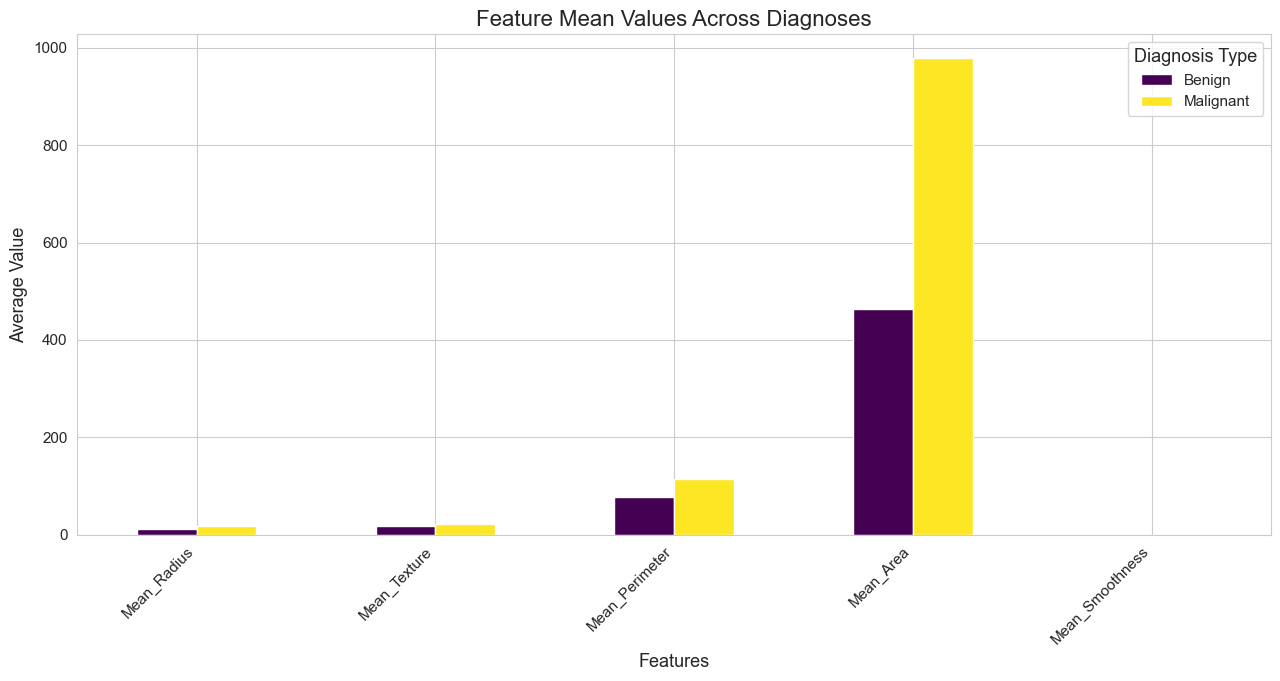


Average values by diagnosis group:
                 Mean_Radius  Mean_Texture  Mean_Perimeter   Mean_Area  \
Diagnosis_Label                                                          
Benign             12.146524     17.914762       78.075406  462.790196   
Malignant          17.462830     21.604906      115.365377  978.376415   

                 Mean_Smoothness  
Diagnosis_Label                   
Benign                  0.092478  
Malignant               0.102898  

Insight: Significant variations in mean values between benign and malignant tumors are evident. These differences are crucial for distinguishing between the two diagnostic outcomes and warrant further statistical investigation.


In [5]:
def compare_attribute_averages(data_frame, attributes_to_compare):
    """Compares mean values of specified attributes across different disease diagnoses."""
    # Mapping diagnosis codes to descriptive labels
    data_frame['Diagnosis_Label'] = data_frame['Disease_Diagnosis'].map({'M': 'Malignant', 'B': 'Benign'})

    # Calculating average values grouped by diagnosis label
    averages_by_diagnosis = data_frame.groupby('Diagnosis_Label')[attributes_to_compare].mean()

    # Plotting the comparison using a bar chart
    plt.figure(figsize=(13, 7))
    averages_by_diagnosis.T.plot(kind='bar', rot=45, ax=plt.gca(), cmap='viridis')
    plt.title('Feature Mean Values Across Diagnoses', fontsize=16)
    plt.ylabel('Average Value', fontsize=13)
    plt.xlabel('Features', fontsize=13)
    plt.xticks(rotation=45, ha='right', fontsize=11)
    plt.yticks(fontsize=11)
    plt.tight_layout() # Adjust layout to prevent labels from overlapping
    plt.legend(title='Diagnosis Type', title_fontsize='13', fontsize='11')
    plt.show()

    # Returning the grouped averages for further review
    return averages_by_diagnosis

# Executing the comparison for the selected numerical attributes
comparison_averages = compare_attribute_averages(medical_data, key_numerical_attributes)
print("\nAverage values by diagnosis group:")
print(comparison_averages)
print("\nInsight: Significant variations in mean values between benign and malignant tumors are evident. These differences are crucial for distinguishing between the two diagnostic outcomes and warrant further statistical investigation.")

## Dispersion Measures: Quantifying Data Spread

Dispersion measures help us understand the variability or spread within our data. We'll compute the range, variance, standard deviation, interquartile range (IQR), and coefficient of variation for our key numerical features. Visualizations like box plots and histograms will accompany these metrics.


Dispersion Statistics for Mean_Radius:
  Range (Max - Min): 21.1290
  Variance: 12.4189
  Standard Deviation: 3.5240
  Interquartile Range (IQR): 4.0800
  Coefficient of Variation (CV): 24.94%


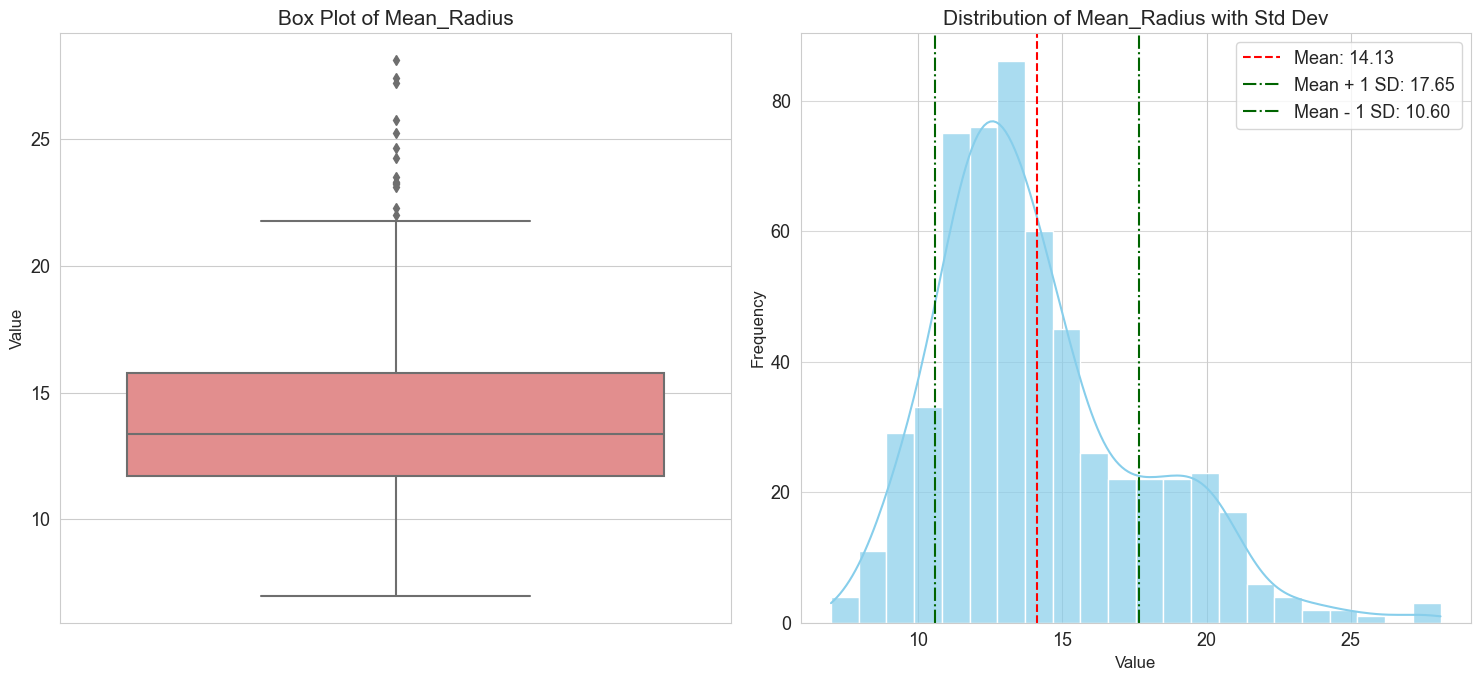


Interpretation:
  Range: The span between the highest and lowest observed values is 21.1290.
  Standard Deviation: On average, individual data points deviate from the mean by approximately 3.5240.
  Interquartile Range (IQR): The central 50% of the dataset values are concentrated within a span of 4.0800.
  Coefficient of Variation: The data shows moderate variability relative to its mean, indicating some level of spread.

----------------------------------------------------------------------


Dispersion Statistics for Mean_Texture:
  Range (Max - Min): 29.5700
  Variance: 18.4989
  Standard Deviation: 4.3010
  Interquartile Range (IQR): 5.6300
  Coefficient of Variation (CV): 22.30%


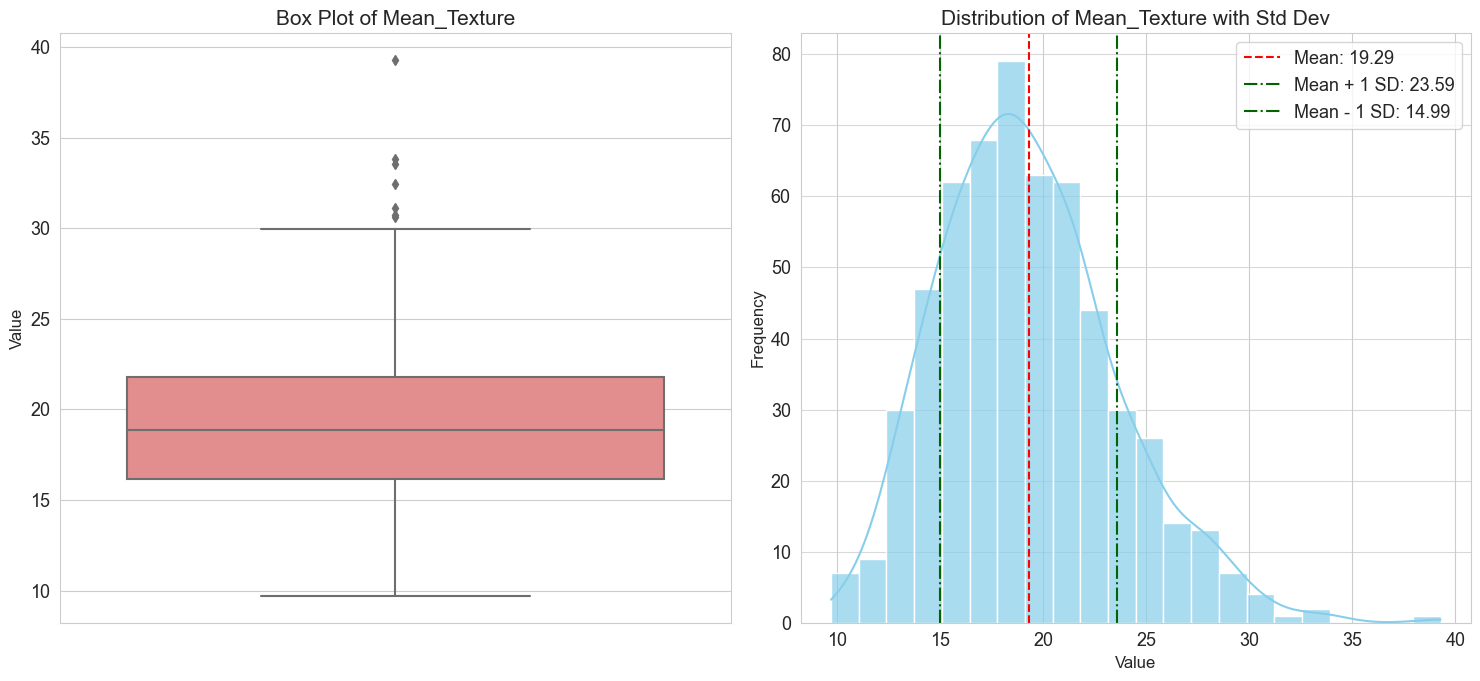


Interpretation:
  Range: The span between the highest and lowest observed values is 29.5700.
  Standard Deviation: On average, individual data points deviate from the mean by approximately 4.3010.
  Interquartile Range (IQR): The central 50% of the dataset values are concentrated within a span of 5.6300.
  Coefficient of Variation: The data shows moderate variability relative to its mean, indicating some level of spread.

----------------------------------------------------------------------


Dispersion Statistics for Mean_Perimeter:
  Range (Max - Min): 144.7100
  Variance: 590.4405
  Standard Deviation: 24.2990
  Interquartile Range (IQR): 28.9300
  Coefficient of Variation (CV): 26.42%


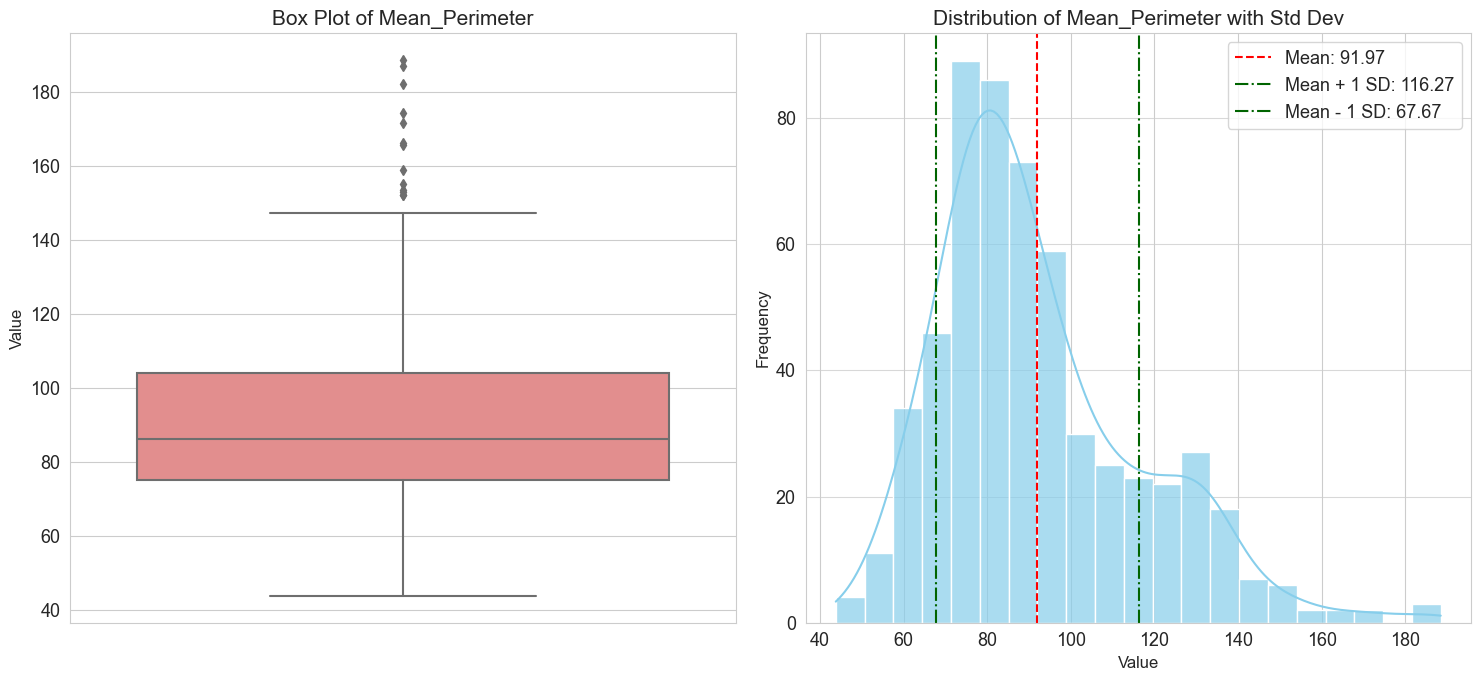


Interpretation:
  Range: The span between the highest and lowest observed values is 144.7100.
  Standard Deviation: On average, individual data points deviate from the mean by approximately 24.2990.
  Interquartile Range (IQR): The central 50% of the dataset values are concentrated within a span of 28.9300.
  Coefficient of Variation: The data shows moderate variability relative to its mean, indicating some level of spread.

----------------------------------------------------------------------


Dispersion Statistics for Mean_Area:
  Range (Max - Min): 2357.5000
  Variance: 123843.5543
  Standard Deviation: 351.9141
  Interquartile Range (IQR): 362.4000
  Coefficient of Variation (CV): 53.74%


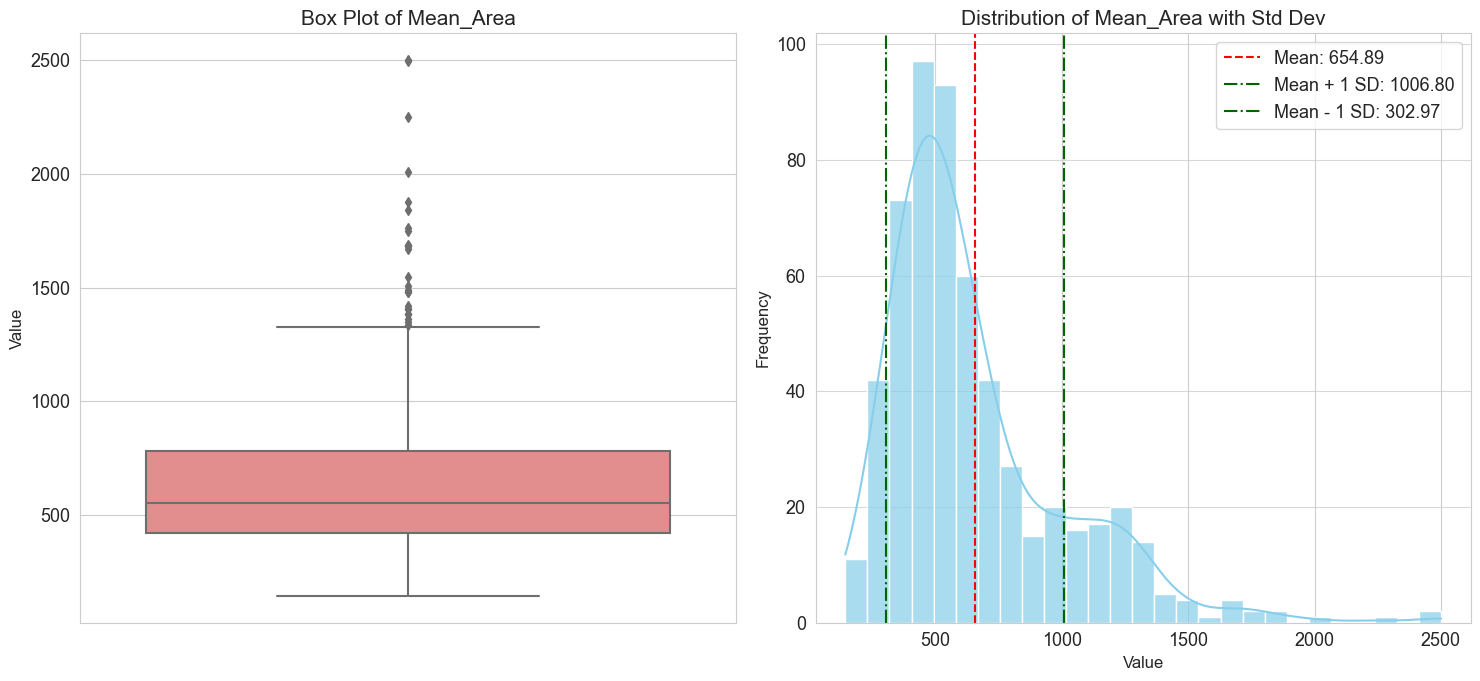


Interpretation:
  Range: The span between the highest and lowest observed values is 2357.5000.
  Standard Deviation: On average, individual data points deviate from the mean by approximately 351.9141.
  Interquartile Range (IQR): The central 50% of the dataset values are concentrated within a span of 362.4000.
  Coefficient of Variation: The data displays high variability relative to its mean, suggesting significant dispersion and less consistency.

----------------------------------------------------------------------


Dispersion Statistics for Mean_Smoothness:
  Range (Max - Min): 0.1108
  Variance: 0.0002
  Standard Deviation: 0.0141
  Interquartile Range (IQR): 0.0189
  Coefficient of Variation (CV): 14.60%


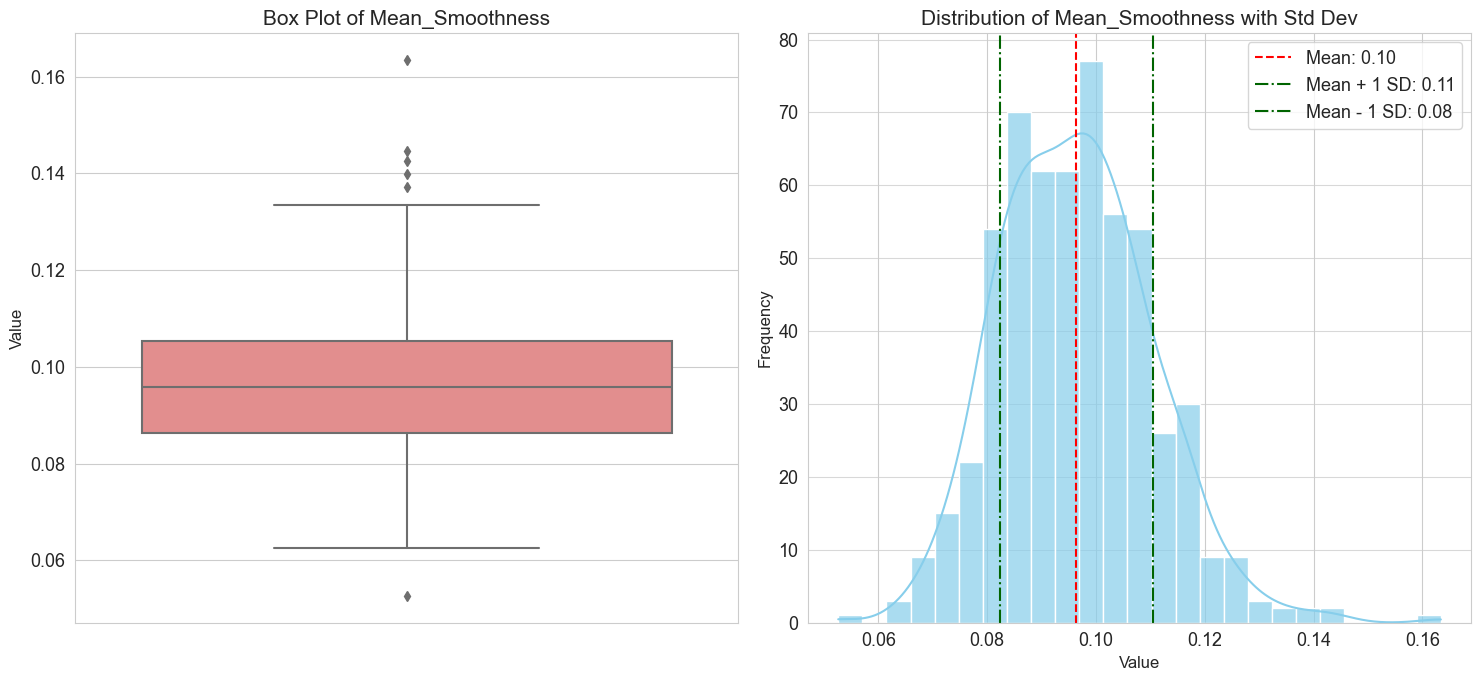


Interpretation:
  Range: The span between the highest and lowest observed values is 0.1108.
  Standard Deviation: On average, individual data points deviate from the mean by approximately 0.0141.
  Interquartile Range (IQR): The central 50% of the dataset values are concentrated within a span of 0.0189.
  Coefficient of Variation: The data exhibits relatively low variability when normalized by the mean, suggesting high consistency.

----------------------------------------------------------------------



In [6]:
# Function to calculate and visualize dispersion metrics
def analyze_data_spread(dataset, attribute_name):
    """Calculates and visualizes dispersion measures for a given attribute."""
    data_values = dataset[attribute_name].dropna() # Drop NaNs

    if data_values.empty:
        print(f"Warning: No data available for {attribute_name} after dropping NaNs. Skipping analysis.")
        return

    # Computing various dispersion statistics
    data_range = data_values.max() - data_values.min()
    data_variance = data_values.var()
    data_std_dev = data_values.std()

    # Quartiles and Interquartile Range (IQR)
    first_quartile = data_values.quantile(0.25)
    third_quartile = data_values.quantile(0.75)
    interquartile_range = third_quartile - first_quartile

    # Coefficient of Variation (CV)
    # A measure of relative variability, useful for comparing dispersion across different scales
    if data_values.mean() != 0:
        coeff_of_variation = (data_std_dev / data_values.mean()) * 100
    else:
        coeff_of_variation = np.nan # Handle division by zero to prevent inf/nan issues

    # Displaying computed dispersion statistics
    print(f"\nDispersion Statistics for {attribute_name}:")
    print(f"  Range (Max - Min): {data_range:.4f}")
    print(f"  Variance: {data_variance:.4f}")
    print(f"  Standard Deviation: {data_std_dev:.4f}")
    print(f"  Interquartile Range (IQR): {interquartile_range:.4f}")
    print(f"  Coefficient of Variation (CV): {coeff_of_variation:.2f}%" if not np.isnan(coeff_of_variation) else "  Coefficient of Variation (CV): N/A")

    # Visualizing data spread with a boxplot and histogram
    plt.figure(figsize=(15, 7))

    plt.subplot(1, 2, 1) # First subplot for the boxplot
    sns.boxplot(y=data_values, color='lightcoral')
    plt.title(f'Box Plot of {attribute_name}', fontsize=15)
    plt.ylabel('Value', fontsize=12)

    plt.subplot(1, 2, 2) # Second subplot for the histogram with standard deviation markers
    sns.histplot(data_values, kde=True, color='skyblue', alpha=0.7)
    plt.axvline(data_values.mean(), color='red', linestyle='--', label=f'Mean: {data_values.mean():.2f}')
    plt.axvline(data_values.mean() + data_std_dev, color='darkgreen', linestyle='-.', label=f'Mean + 1 SD: {data_values.mean() + data_std_dev:.2f}')
    plt.axvline(data_values.mean() - data_std_dev, color='darkgreen', linestyle='-.', label=f'Mean - 1 SD: {data_values.mean() - data_std_dev:.2f}')
    plt.title(f'Distribution of {attribute_name} with Std Dev', fontsize=15)
    plt.xlabel('Value', fontsize=12)
    plt.ylabel('Frequency', fontsize=12)
    plt.legend()
    plt.grid(axis='y', alpha=0.75)

    plt.tight_layout() # Adjust layout
    plt.show()

    # Interpreting dispersion insights
    print("\nInterpretation:")
    print(f"  Range: The span between the highest and lowest observed values is {data_range:.4f}.")
    print(f"  Standard Deviation: On average, individual data points deviate from the mean by approximately {data_std_dev:.4f}.")
    print(f"  Interquartile Range (IQR): The central 50% of the dataset values are concentrated within a span of {interquartile_range:.4f}.")

    # CV interpretation
    if not np.isnan(coeff_of_variation):
        if coeff_of_variation < 15:
            print("  Coefficient of Variation: The data exhibits relatively low variability when normalized by the mean, suggesting high consistency.")
        elif coeff_of_variation < 40:
            print("  Coefficient of Variation: The data shows moderate variability relative to its mean, indicating some level of spread.")
        else:
            print("  Coefficient of Variation: The data displays high variability relative to its mean, suggesting significant dispersion and less consistency.")
    else:
        print("  Coefficient of Variation: N/A (mean is zero, cannot calculate relative variability).")
    print("\n" + "-"*70 + "\n")

# Applying the dispersion analysis to each selected attribute
for attribute in key_numerical_attributes:
    analyze_data_spread(medical_data, attribute)

## Comparative Analysis of Dispersion by Diagnosis

Similar to means, comparing dispersion measures between benign and malignant tumors can offer insights into the consistency and spread of feature values within each group. We'll visualize standard deviations and coefficients of variation.

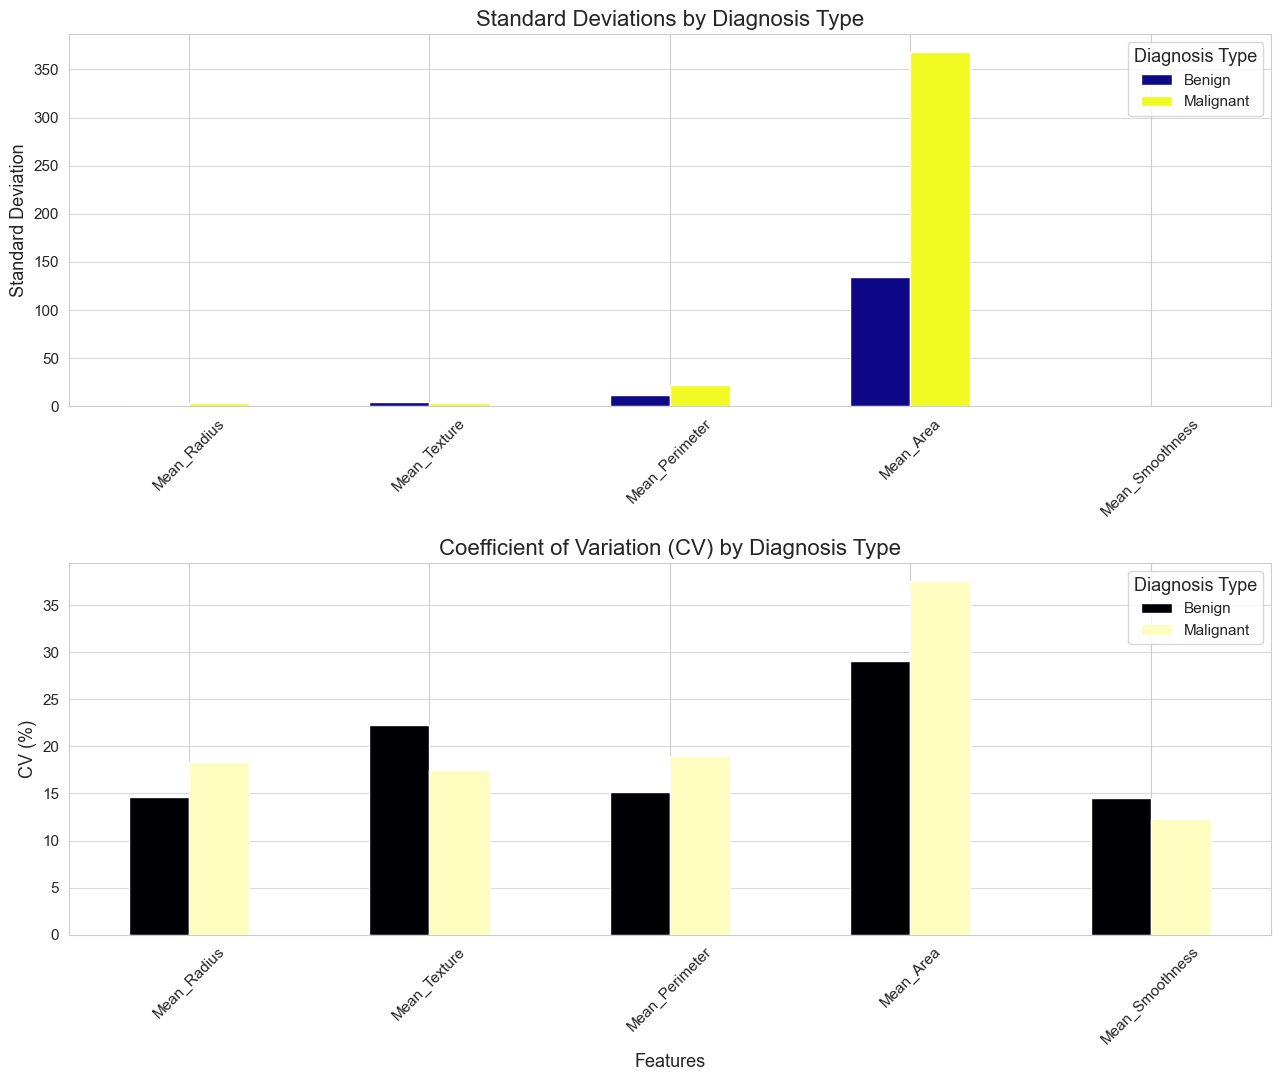


Standard deviation values by diagnosis group:
                 Mean_Radius  Mean_Texture  Mean_Perimeter   Mean_Area  \
Diagnosis_Label                                                          
Benign              1.780512      3.995125       11.807438  134.287118   
Malignant           3.203971      3.779470       21.854653  367.937978   

                 Mean_Smoothness  
Diagnosis_Label                   
Benign                  0.013446  
Malignant               0.012608  

Coefficient of Variation values by diagnosis group:
                 Mean_Radius  Mean_Texture  Mean_Perimeter  Mean_Area  \
Diagnosis_Label                                                         
Benign             14.658611     22.300741       15.123120  29.016846   
Malignant          18.347376     17.493573       18.943858  37.606996   

                 Mean_Smoothness  
Diagnosis_Label                   
Benign                 14.539813  
Malignant              12.253081  

Insight: Observing how variab

In [7]:
def assess_diagnosis_variability(data_frame, attributes_for_variability):
    """Compares measures of data variability (Std Dev and CV) across disease diagnoses."""
    # Ensure diagnosis labels are present
    if 'Diagnosis_Label' not in data_frame.columns:
        data_frame['Diagnosis_Label'] = data_frame['Disease_Diagnosis'].map({'M': 'Malignant', 'B': 'Benign'})

    # Calculate standard deviations grouped by diagnosis
    std_devs_by_diagnosis = data_frame.groupby('Diagnosis_Label')[attributes_for_variability].std()

    # Calculate mean values grouped by diagnosis for CV calculation
    means_by_diagnosis = data_frame.groupby('Diagnosis_Label')[attributes_for_variability].mean()

    # Compute Coefficient of Variation (CV) - handle division by zero
    cvs_by_diagnosis = (std_devs_by_diagnosis / means_by_diagnosis) * 100
    cvs_by_diagnosis = cvs_by_diagnosis.replace([np.inf, -np.inf], np.nan) # Replace inf with NaN

    # Creating subplots for visualizing standard deviations and CVs
    fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(13, 11))

    # Plotting standard deviations
    std_devs_by_diagnosis.T.plot(kind='bar', rot=45, ax=axes[0], cmap='plasma')
    axes[0].set_title('Standard Deviations by Diagnosis Type', fontsize=16)
    axes[0].set_ylabel('Standard Deviation', fontsize=13)
    axes[0].tick_params(axis='x', rotation=45, labelsize=11)
    axes[0].tick_params(axis='y', labelsize=11)
    axes[0].legend(title='Diagnosis Type', title_fontsize='13', fontsize='11')
    axes[0].grid(axis='y', alpha=0.75)

    # Plotting coefficients of variation
    cvs_by_diagnosis.T.plot(kind='bar', rot=45, ax=axes[1], cmap='magma')
    axes[1].set_title('Coefficient of Variation (CV) by Diagnosis Type', fontsize=16)
    axes[1].set_ylabel('CV (%)', fontsize=13)
    axes[1].set_xlabel('Features', fontsize=13)
    axes[1].tick_params(axis='x', rotation=45, labelsize=11)
    axes[1].tick_params(axis='y', labelsize=11)
    axes[1].legend(title='Diagnosis Type', title_fontsize='13', fontsize='11')
    axes[1].grid(axis='y', alpha=0.75)

    plt.tight_layout() # Adjust layout
    plt.show()

    # Returning the grouped statistics for further analysis
    return std_devs_by_diagnosis, cvs_by_diagnosis

# Executing the dispersion comparison
diagnosis_std_dev, diagnosis_cv = assess_diagnosis_variability(medical_data, key_numerical_attributes)
print("\nStandard deviation values by diagnosis group:")
print(diagnosis_std_dev)

print("\nCoefficient of Variation values by diagnosis group:")
print(diagnosis_cv)
print("\nInsight: Observing how variability metrics (Standard Deviation and Coefficient of Variation) differ between benign and malignant tumors provides insights into the consistency of cellular characteristics within each group. Higher variability might suggest a broader spectrum of cellular manifestations, potentially useful in understanding disease heterogeneity.")

## Advanced Data Visualization Techniques

Beyond basic descriptive statistics, advanced visualizations help us uncover deeper relationships and patterns within the data. We will use correlation matrices, pair plots, and combined box/swarm/violin plots to explore inter-feature relationships and group differences.

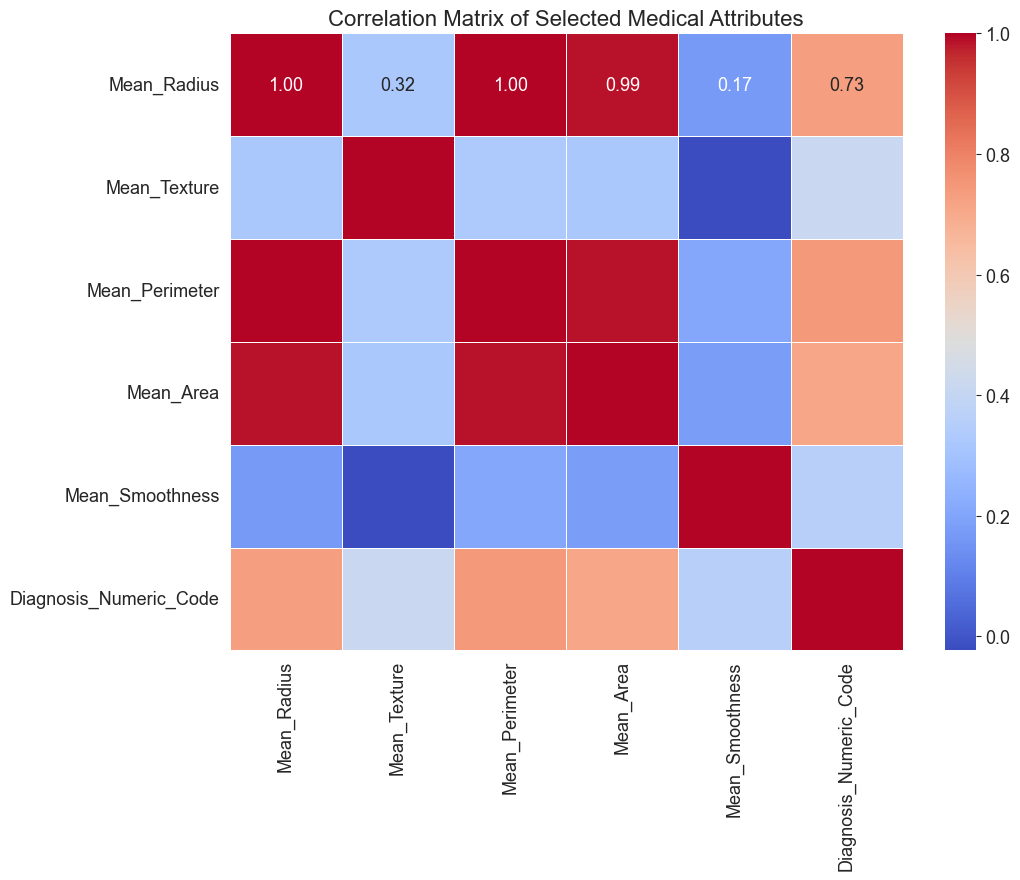


Explanation of Correlation Matrix:
  This matrix illustrates the strength and direction of linear relationships between pairs of variables. Values range from -1 to 1:
    +1: Indicates a perfect positive linear relationship (as one variable increases, the other proportionally increases).
    0: Denotes no linear relationship.
    -1: Signifies a perfect negative linear relationship (as one variable increases, the other proportionally decreases).

  Key Insight: Observe which attributes demonstrate the strongest correlation with the diagnosis, as these may be critical indicators.


In [8]:
# Converting categorical diagnosis to a numerical representation for correlation analysis
medical_data['Diagnosis_Numeric_Code'] = medical_data['Disease_Diagnosis'].map({'M': 1, 'B': 0})

# Selecting features pertinent for detailed visualization
visualization_attributes = ['Mean_Radius', 'Mean_Texture', 'Mean_Perimeter', 'Mean_Area', 'Mean_Smoothness', 'Diagnosis_Numeric_Code']

# Constructing a correlation matrix to show linear relationships between attributes
correlation_matrix_features = medical_data[visualization_attributes].corr()

# Visualizing the correlation matrix using a heatmap
plt.figure(figsize=(11, 9))
sns.heatmap(correlation_matrix_features, annot=True, cmap='coolwarm', fmt=".2f",
            xticklabels=visualization_attributes,
            yticklabels=visualization_attributes,
            linewidths=.5)
plt.title('Correlation Matrix of Selected Medical Attributes', fontsize=16)
plt.tight_layout()
plt.show()

print("\nExplanation of Correlation Matrix:")
print("  This matrix illustrates the strength and direction of linear relationships between pairs of variables. Values range from -1 to 1:")
print("    +1: Indicates a perfect positive linear relationship (as one variable increases, the other proportionally increases).")
print("    0: Denotes no linear relationship.")
print("    -1: Signifies a perfect negative linear relationship (as one variable increases, the other proportionally decreases).")
print("\n  Key Insight: Observe which attributes demonstrate the strongest correlation with the diagnosis, as these may be critical indicators.")

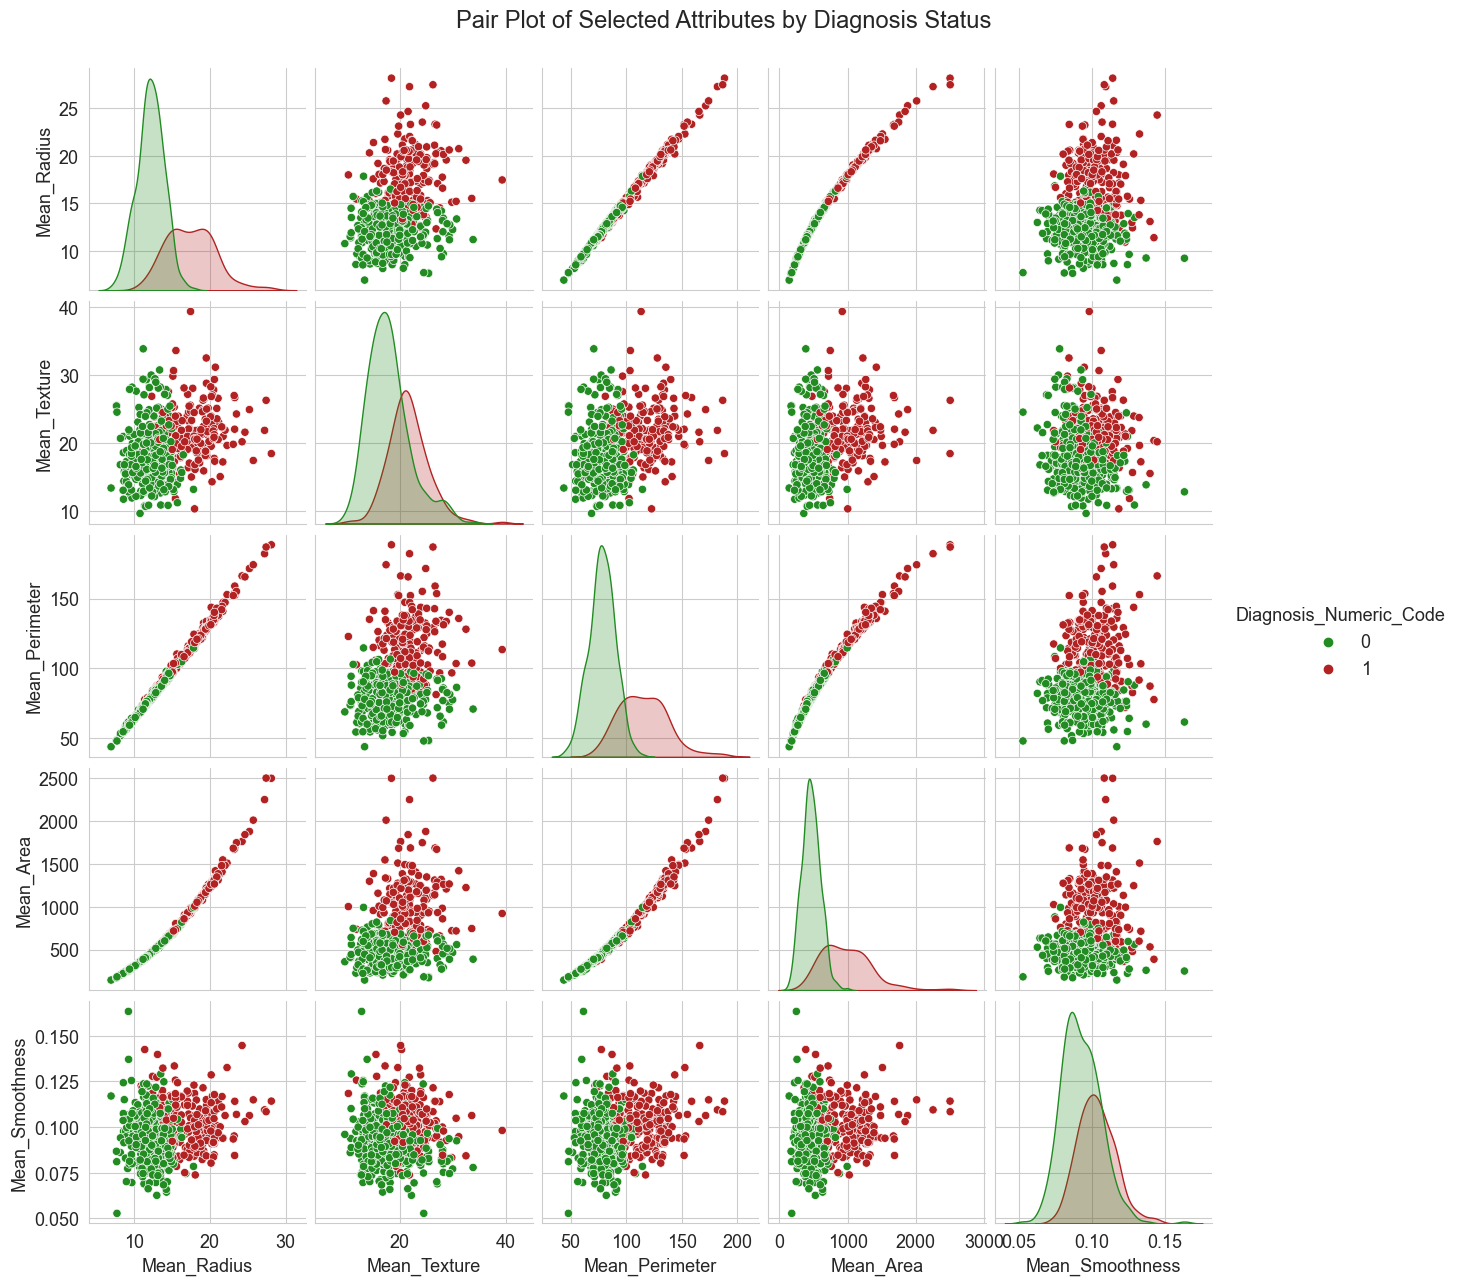


Explanation of Pair Plot:
  A pair plot provides a matrix of scatter plots for each pair of variables and histograms/KDEs for individual variables. It's excellent for visualizing bivariate relationships and the overall distribution of each attribute.
  Diagonal plots (histograms/KDEs) show the distribution of single variables.
  Off-diagonal plots (scatter plots) illustrate the relationship between two variables.
  Data points are color-coded by diagnosis (green for benign, red for malignant), helping to identify clusters or separations related to the diagnosis.

  Key Insight: This visualization helps in identifying potential patterns, separable clusters, or areas where diagnostic groups overlap, indicating features that might be more predictive.


In [9]:
# Creating a pair plot to visualize relationships and distributions between feature pairs
pair_plot_grid = sns.pairplot(medical_data[visualization_attributes],
                              hue='Diagnosis_Numeric_Code',
                              palette={0: 'forestgreen', 1: 'firebrick'}, # Custom colors for diagnosis types
                              hue_order=[0, 1],
                              diag_kind='kde') # Use KDE for diagonal plots for density estimation

pair_plot_grid.fig.suptitle('Pair Plot of Selected Attributes by Diagnosis Status', y=1.03, fontsize=17)
plt.show()

print("\nExplanation of Pair Plot:")
print("  A pair plot provides a matrix of scatter plots for each pair of variables and histograms/KDEs for individual variables. It's excellent for visualizing bivariate relationships and the overall distribution of each attribute.")
print("  Diagonal plots (histograms/KDEs) show the distribution of single variables.")
print("  Off-diagonal plots (scatter plots) illustrate the relationship between two variables.")
print("  Data points are color-coded by diagnosis (green for benign, red for malignant), helping to identify clusters or separations related to the diagnosis.")
print("\n  Key Insight: This visualization helps in identifying potential patterns, separable clusters, or areas where diagnostic groups overlap, indicating features that might be more predictive.")

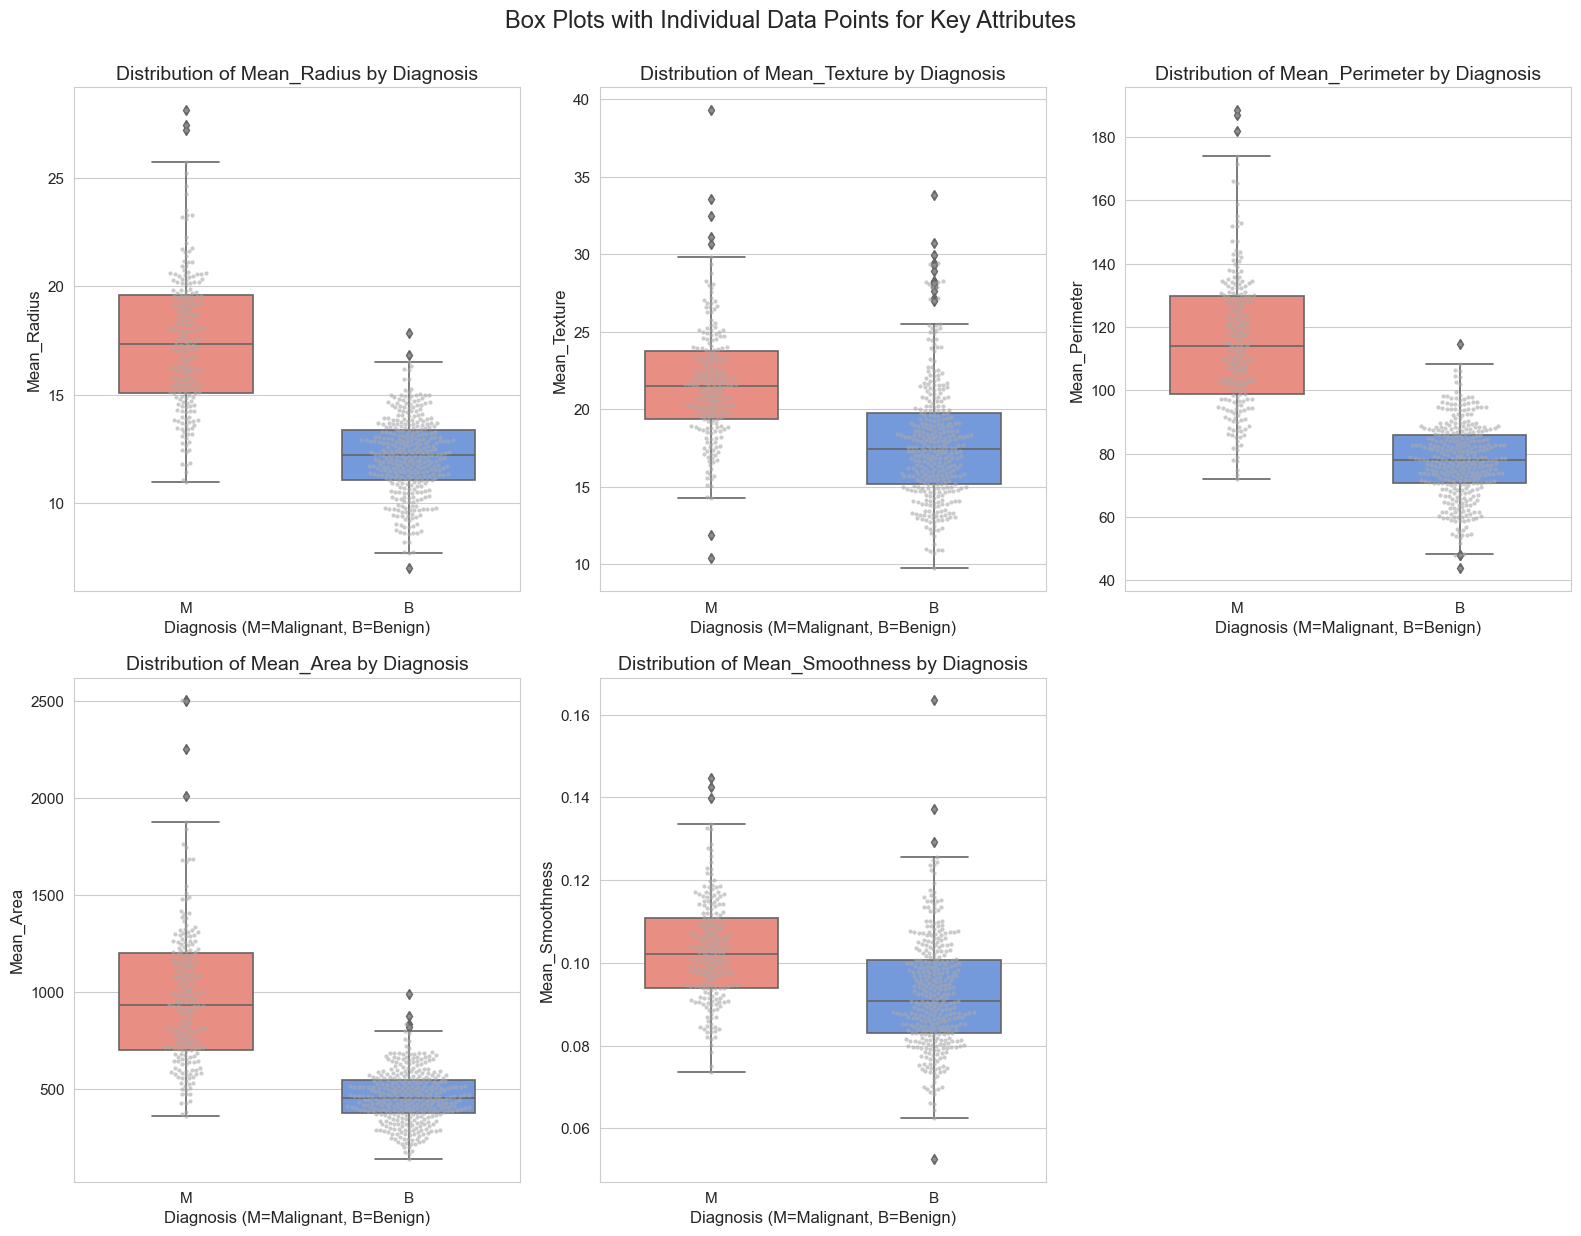


Explanation of Box Plots with Swarm Plots:
  Box plots effectively summarize the median, quartiles (interquartile range), and potential outliers for each group. The 'box' represents the middle 50% of the data, the line inside is the median, and the 'whiskers' extend to data points within 1.5 times the IQR from the box edges.
  Swarm plots overlay individual data points, providing a view of the actual data density and distribution without obscuring points. This combination offers both aggregated summary statistics and the raw data distribution.

  Key Insight: This allows for a clear comparison of both the central tendency and spread across benign and malignant diagnoses, highlighting differences in feature ranges and concentrations.


In [10]:
# Advanced visualization: Combining box plots with individual data points (swarm plots)
plt.figure(figsize=(16, 12))
for idx, attribute in enumerate(key_numerical_attributes, 1):
    plt.subplot(2, 3, idx)
    # Box plot for summary statistics of groups
    sns.boxplot(x='Disease_Diagnosis', y=attribute, data=medical_data, 
                palette={'M': 'salmon', 'B': 'cornflowerblue'}, width=0.6, linewidth=1.2)
    # Swarm plot to show individual data points, avoiding overlap
    sns.swarmplot(x='Disease_Diagnosis', y=attribute, data=medical_data, 
                  color='darkgrey', alpha=0.6, size=3)
    plt.title(f'Distribution of {attribute} by Diagnosis', fontsize=14)
    plt.xlabel('Diagnosis (M=Malignant, B=Benign)', fontsize=12)
    plt.ylabel(attribute, fontsize=12)
    plt.xticks(fontsize=11)
    plt.yticks(fontsize=11)

plt.tight_layout()
plt.suptitle('Box Plots with Individual Data Points for Key Attributes', y=1.03, fontsize=17)
plt.show()

print("\nExplanation of Box Plots with Swarm Plots:")
print("  Box plots effectively summarize the median, quartiles (interquartile range), and potential outliers for each group. The 'box' represents the middle 50% of the data, the line inside is the median, and the 'whiskers' extend to data points within 1.5 times the IQR from the box edges.")
print("  Swarm plots overlay individual data points, providing a view of the actual data density and distribution without obscuring points. This combination offers both aggregated summary statistics and the raw data distribution.")
print("\n  Key Insight: This allows for a clear comparison of both the central tendency and spread across benign and malignant diagnoses, highlighting differences in feature ranges and concentrations.")

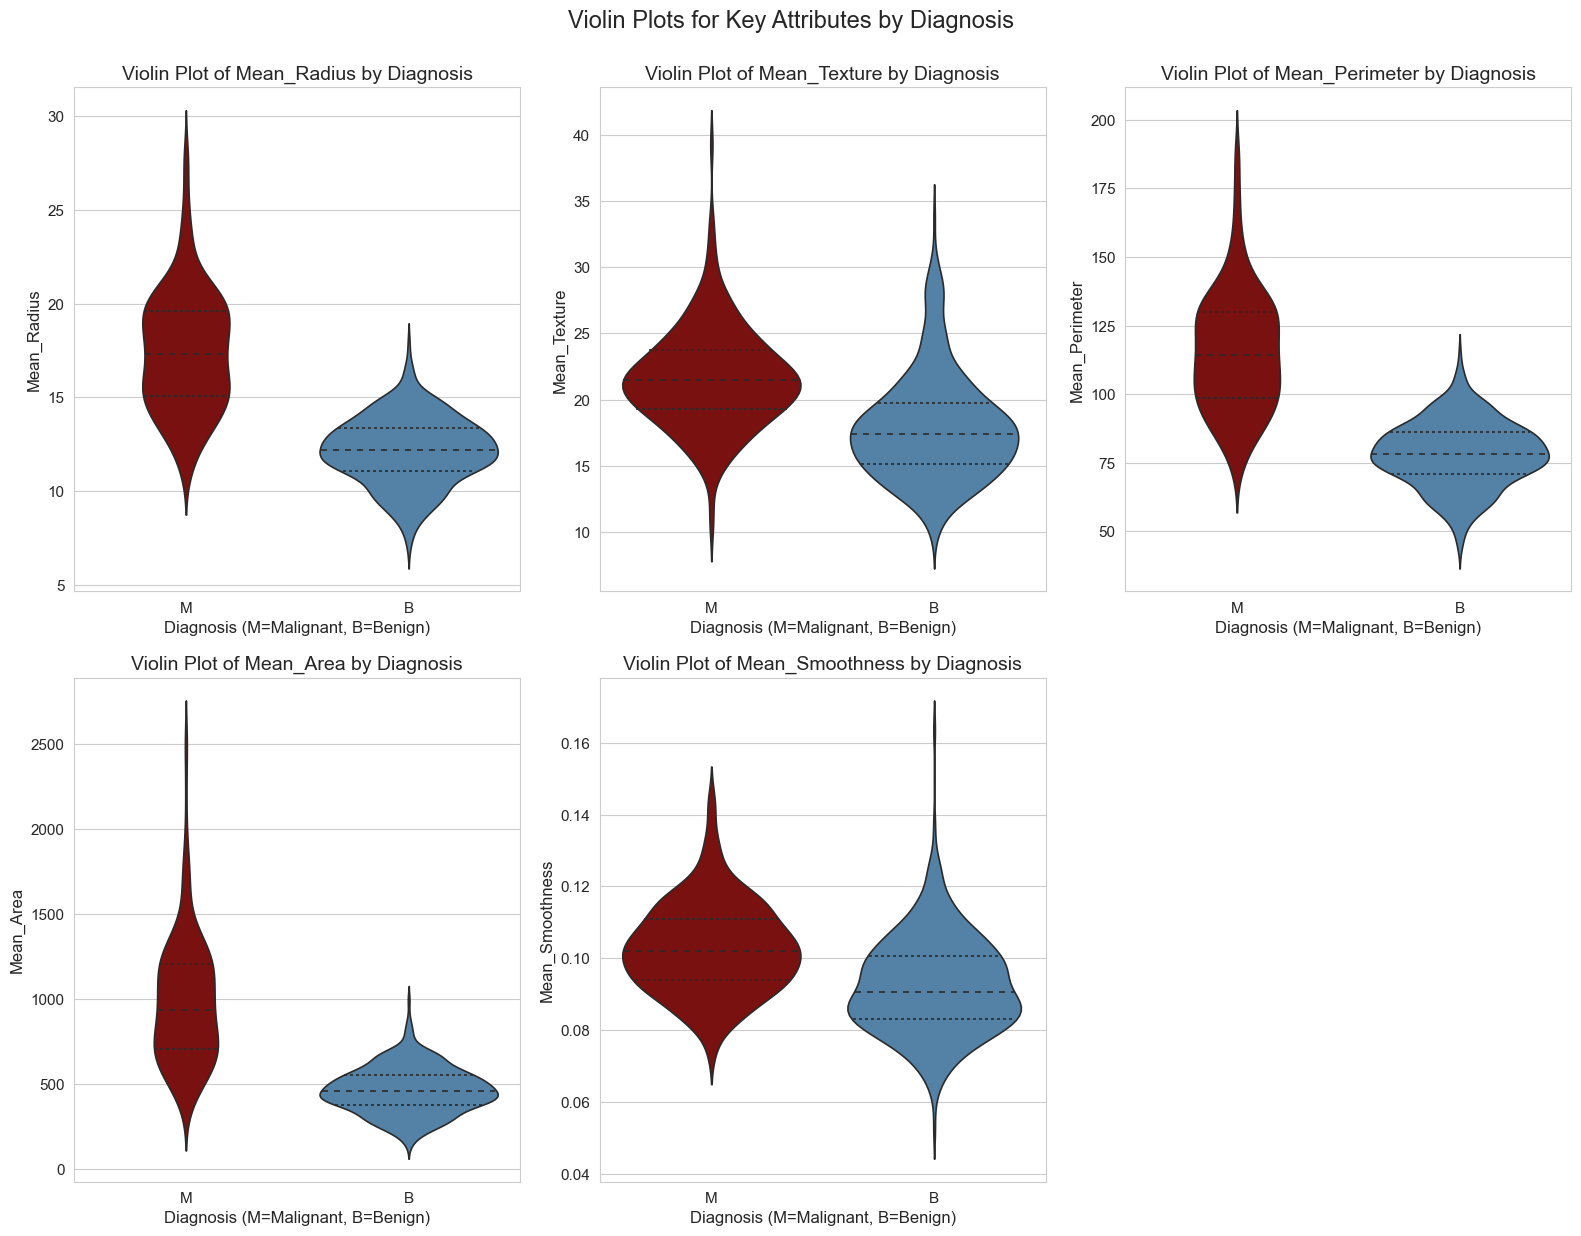


Explanation of Violin Plots:
  Violin plots are an advanced visualization that combines aspects of box plots and kernel density plots. They display the distribution shape, density, and key statistical summaries for each group.
  The wider sections of the 'violin' indicate a higher probability density (more data points), while narrower sections represent lower density. The inner markings typically show the median and interquartile range.

  Key Insight: These plots are highly effective for comparing complex distributions between groups, allowing us to discern not just differences in central location and spread, but also variations in modality (e.g., bimodal distributions) and skewness for each diagnosis type.


In [11]:
# Violin plots for a richer comparison of distribution shapes
plt.figure(figsize=(16, 12))
for idx, attribute in enumerate(key_numerical_attributes, 1):
    plt.subplot(2, 3, idx)
    sns.violinplot(x='Disease_Diagnosis', y=attribute, data=medical_data, 
                   palette={'M': 'darkred', 'B': 'steelblue'}, inner='quartile', linewidth=1.2)
    plt.title(f'Violin Plot of {attribute} by Diagnosis', fontsize=14)
    plt.xlabel('Diagnosis (M=Malignant, B=Benign)', fontsize=12)
    plt.ylabel(attribute, fontsize=12)
    plt.xticks(fontsize=11)
    plt.yticks(fontsize=11)

plt.tight_layout()
plt.suptitle('Violin Plots for Key Attributes by Diagnosis', y=1.03, fontsize=17)
plt.show()

print("\nExplanation of Violin Plots:")
print("  Violin plots are an advanced visualization that combines aspects of box plots and kernel density plots. They display the distribution shape, density, and key statistical summaries for each group.")
print("  The wider sections of the 'violin' indicate a higher probability density (more data points), while narrower sections represent lower density. The inner markings typically show the median and interquartile range.")
print("\n  Key Insight: These plots are highly effective for comparing complex distributions between groups, allowing us to discern not just differences in central location and spread, but also variations in modality (e.g., bimodal distributions) and skewness for each diagnosis type.")

## Comprehensive Statistical Summary by Groups

To consolidate our understanding, we will generate a detailed statistical summary for each feature, broken down by diagnosis type (Benign vs. Malignant). This provides a quick reference for comparing the full range of descriptive statistics between the groups.

In [12]:
# Grouping the dataset by 'Disease_Diagnosis' and calculating descriptive statistics for numerical features
full_grouped_statistics = medical_data.groupby('Disease_Diagnosis')[key_numerical_attributes].describe()

print("Comprehensive Statistical Summary Grouped by Diagnosis:")
print(full_grouped_statistics)

print("\nThis detailed table provides a side-by-side comparison of various descriptive statistics (count, mean, std, min, 25%, 50%, 75%, max) for each key attribute, segregated by benign (B) and malignant (M) diagnoses. It serves as a rich source of information for understanding the characteristic differences between the two disease states across all measured parameters.")

Comprehensive Statistical Summary Grouped by Diagnosis:
                  Mean_Radius                                               \
                        count       mean       std     min     25%     50%   
Disease_Diagnosis                                                            
B                       357.0  12.146524  1.780512   6.981  11.080  12.200   
M                       212.0  17.462830  3.203971  10.950  15.075  17.325   

                                Mean_Texture             ... Mean_Area  \
                     75%    max        count       mean  ...       75%   
Disease_Diagnosis                                        ...             
B                  13.37  17.85        357.0  17.914762  ...    551.10   
M                  19.59  28.11        212.0  21.604906  ...   1203.75   

                          Mean_Smoothness                               \
                      max           count      mean       std      min   
Disease_Diagnosis                 

## Simplified Group-wise Statistical Summary

While the `describe()` method is powerful, a more streamlined summary focusing on key metrics (mean, median, standard deviation, min, max) can sometimes be more digestible. We'll create a custom summary for easier comparison.

In [13]:
custom_summary_data = {}

for attribute in key_numerical_attributes:
    # Extracting statistics for benign cases
    benign_case_stats = medical_data[medical_data['Disease_Diagnosis'] == 'B'][attribute].agg(['mean', 'median', 'std', 'min', 'max']).to_dict()
    # Extracting statistics for malignant cases
    malignant_case_stats = medical_data[medical_data['Disease_Diagnosis'] == 'M'][attribute].agg(['mean', 'median', 'std', 'min', 'max']).to_dict()

    # Renaming dictionary keys to clearly indicate diagnosis type
    benign_prefixed_stats = {f'Benign_{key}': value for key, value in benign_case_stats.items()}
    malignant_prefixed_stats = {f'Malignant_{key}': value for key, value in malignant_case_stats.items()}

    # Combining the statistics for both groups under the current attribute
    custom_summary_data[attribute] = {**benign_prefixed_stats, **malignant_prefixed_stats}

# Converting the aggregated dictionary into a clean DataFrame for display
simplified_group_stats_df = pd.DataFrame(custom_summary_data).T

print("\nStreamlined Group-wise Statistical Summary (Attributes as Rows):")
print(simplified_group_stats_df)

print("\nSignificant Observations from Group Comparisons:")
for attribute in key_numerical_attributes:
    benign_mean = medical_data[medical_data['Disease_Diagnosis'] == 'B'][attribute].mean()
    malignant_mean = medical_data[medical_data['Disease_Diagnosis'] == 'M'][attribute].mean()

    # Calculating the percentage difference between malignant and benign means
    if benign_mean != 0:
        percentage_difference = abs((malignant_mean - benign_mean) / benign_mean) * 100
    else:
        percentage_difference = float('inf') # Handle division by zero if benign_mean is 0

    comparison_term = "higher" if malignant_mean > benign_mean else "lower"

    print(f"  For {attribute}, malignant tumors consistently exhibit {comparison_term} average values (by {percentage_difference:.1f}%) compared to benign tumors. This percentage difference highlights the potential discriminatory power of these features.")


Streamlined Group-wise Statistical Summary (Attributes as Rows):
                 Benign_mean  Benign_median  Benign_std  Benign_min  \
Mean_Radius        12.146524       12.20000    1.780512     6.98100   
Mean_Texture       17.914762       17.39000    3.995125     9.71000   
Mean_Perimeter     78.075406       78.18000   11.807438    43.79000   
Mean_Area         462.790196      458.40000  134.287118   143.50000   
Mean_Smoothness     0.092478        0.09076    0.013446     0.05263   

                 Benign_max  Malignant_mean  Malignant_median  Malignant_std  \
Mean_Radius         17.8500       17.462830           17.3250       3.203971   
Mean_Texture        33.8100       21.604906           21.4600       3.779470   
Mean_Perimeter     114.6000      115.365377          114.2000      21.854653   
Mean_Area          992.1000      978.376415          932.0000     367.937978   
Mean_Smoothness      0.1634        0.102898            0.1022       0.012608   

                 Malignant

## Assessing Data Normality and Outlier Detection

Understanding if data adheres to a normal distribution is crucial for many statistical tests. We'll use Q-Q plots and the Shapiro-Wilk test to check for normality. Additionally, identifying outliers, which are data points significantly different from others, is important as they can skew results. We'll use the IQR method for outlier detection.

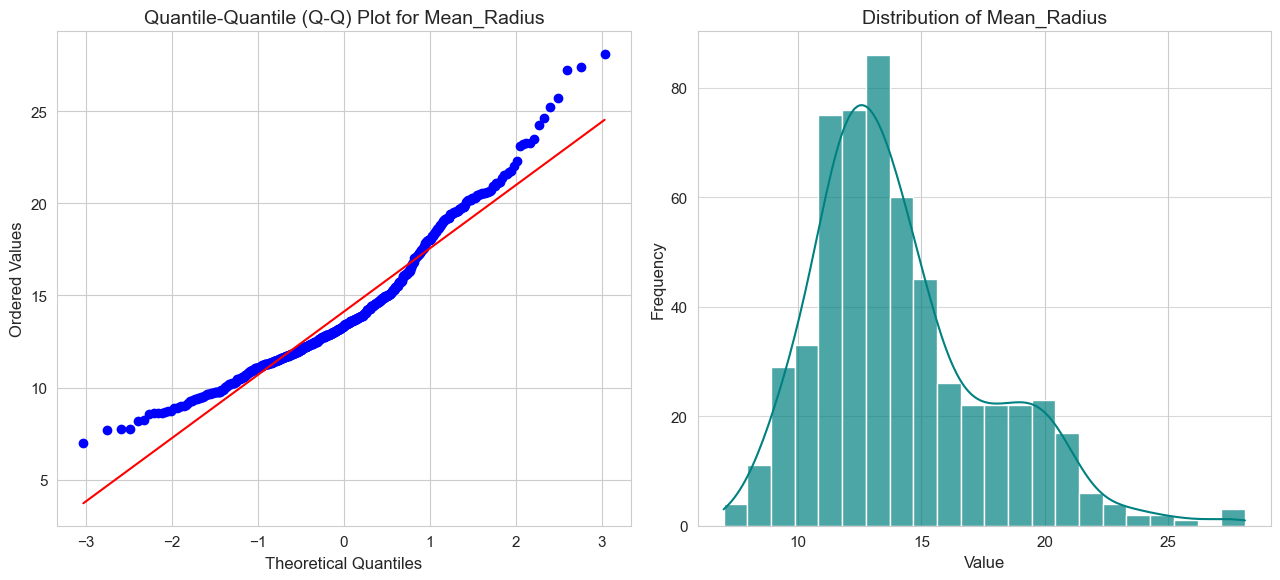

Normality Evaluation for Mean_Radius:
  Shapiro-Wilk Test: Statistic = 0.9411, p-value = 0.00000000
  Conclusion: The data significantly deviates from a normal distribution (p < 0.05), as indicated by the test.
  Skewness: 0.9399
    Interpretation: The distribution is notably right-skewed (positively skewed), implying a tail extending towards higher values.
  Kurtosis: 0.8276
    Interpretation: The distribution is leptokurtic (has heavier tails and sharper peak), suggesting more outliers than a normal distribution.

----------------------------------------------------------------------



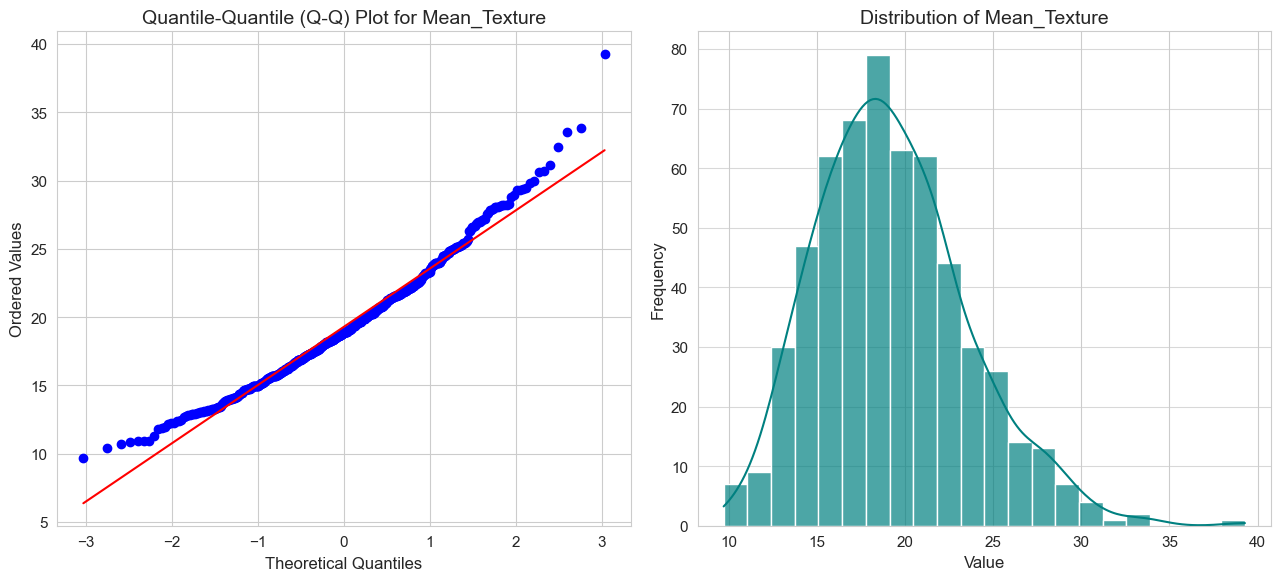

Normality Evaluation for Mean_Texture:
  Shapiro-Wilk Test: Statistic = 0.9767, p-value = 0.00000007
  Conclusion: The data significantly deviates from a normal distribution (p < 0.05), as indicated by the test.
  Skewness: 0.6487
    Interpretation: The distribution is notably right-skewed (positively skewed), implying a tail extending towards higher values.
  Kurtosis: 0.7411
    Interpretation: The distribution is leptokurtic (has heavier tails and sharper peak), suggesting more outliers than a normal distribution.

----------------------------------------------------------------------



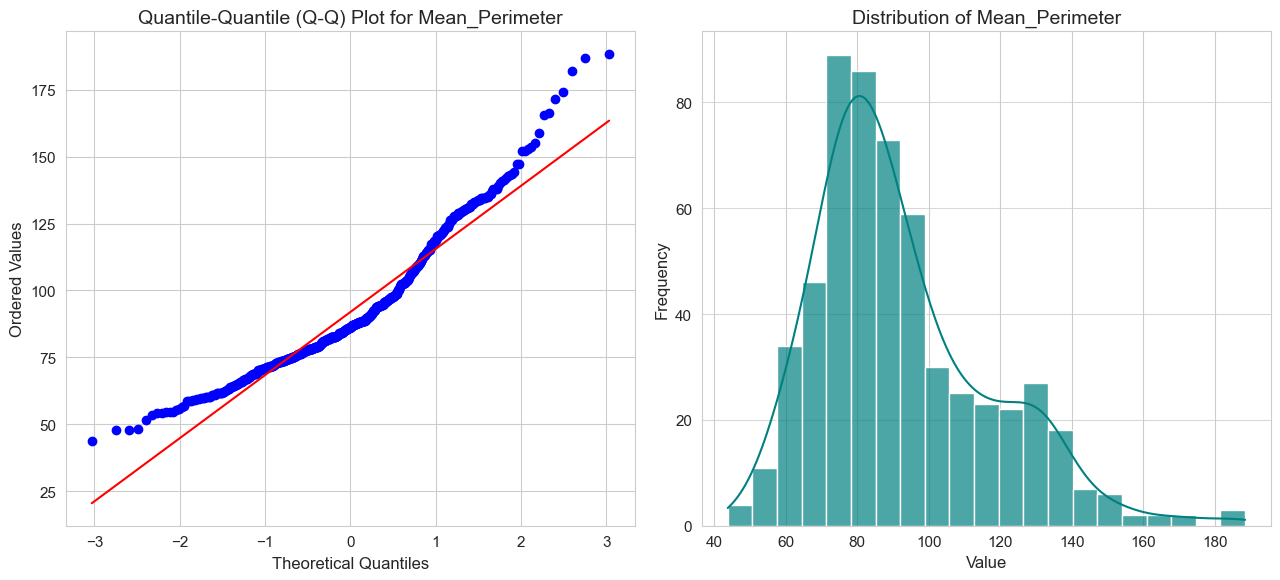

Normality Evaluation for Mean_Perimeter:
  Shapiro-Wilk Test: Statistic = 0.9362, p-value = 0.00000000
  Conclusion: The data significantly deviates from a normal distribution (p < 0.05), as indicated by the test.
  Skewness: 0.9880
    Interpretation: The distribution is notably right-skewed (positively skewed), implying a tail extending towards higher values.
  Kurtosis: 0.9532
    Interpretation: The distribution is leptokurtic (has heavier tails and sharper peak), suggesting more outliers than a normal distribution.

----------------------------------------------------------------------



In [14]:
# Function to evaluate data normality using visual and statistical tests
def evaluate_normality(data_frame, attribute_name):
    """Assesses if an attribute's data follows a normal distribution using QQ-plots and the Shapiro-Wilk test."""
    attribute_values = data_frame[attribute_name].dropna() # Drop NaNs

    if attribute_values.empty:
        print(f"Warning: No data available for {attribute_name} after dropping NaNs. Skipping normality evaluation.")
        return
    if len(attribute_values) < 3: # Shapiro-Wilk requires at least 3 data points
        print(f"Warning: Not enough data points ({len(attribute_values)}) for {attribute_name} to perform Shapiro-Wilk test. Skipping normality evaluation.")
        return

    # Visual assessment: Q-Q plot and histogram
    plt.figure(figsize=(13, 6))

    plt.subplot(1, 2, 1)
    stats.probplot(attribute_values, dist="norm", plot=plt)
    plt.title(f'Quantile-Quantile (Q-Q) Plot for {attribute_name}', fontsize=14)
    plt.xlabel('Theoretical Quantiles', fontsize=12)
    plt.ylabel('Ordered Values', fontsize=12)
    plt.xticks(fontsize=11)
    plt.yticks(fontsize=11)

    plt.subplot(1, 2, 2)
    sns.histplot(attribute_values, kde=True, color='teal', alpha=0.7)
    plt.title(f'Distribution of {attribute_name}', fontsize=14)
    plt.xlabel('Value', fontsize=12)
    plt.ylabel('Frequency', fontsize=12)
    plt.xticks(fontsize=11)
    plt.yticks(fontsize=11)
    plt.grid(axis='y', alpha=0.75)

    plt.tight_layout()
    plt.show()

    # Statistical assessment: Shapiro-Wilk test
    shapiro_statistic, shapiro_p_value = stats.shapiro(attribute_values)

    print(f"Normality Evaluation for {attribute_name}:")
    print(f"  Shapiro-Wilk Test: Statistic = {shapiro_statistic:.4f}, p-value = {shapiro_p_value:.8f}")

    if shapiro_p_value < 0.05:
        print("  Conclusion: The data significantly deviates from a normal distribution (p < 0.05), as indicated by the test.")
    else:
        print("  Conclusion: The data appears to follow a normal distribution (p >= 0.05), based on the test results.")

    # Skewness and Kurtosis analysis
    calculated_skewness = stats.skew(attribute_values)
    calculated_kurtosis = stats.kurtosis(attribute_values)

    print(f"  Skewness: {calculated_skewness:.4f}")
    if abs(calculated_skewness) < 0.5:
        print("    Interpretation: The distribution is approximately symmetric.")
    elif calculated_skewness > 0.5:
        print("    Interpretation: The distribution is notably right-skewed (positively skewed), implying a tail extending towards higher values.")
    else:
        print("    Interpretation: The distribution is notably left-skewed (negatively skewed), implying a tail extending towards lower values.")

    print(f"  Kurtosis: {calculated_kurtosis:.4f}")
    if abs(calculated_kurtosis) < 0.5:
        print("    Interpretation: The distribution's tail weight is similar to that of a normal distribution (mesokurtic).")
    elif calculated_kurtosis > 0.5:
        print("    Interpretation: The distribution is leptokurtic (has heavier tails and sharper peak), suggesting more outliers than a normal distribution.")
    else:
        print("    Interpretation: The distribution is platykurtic (has lighter tails and flatter peak), suggesting fewer outliers than a normal distribution.")
    print("\n" + "-"*70 + "\n")

# Applying normality check for the initial few attributes
for attribute in key_numerical_attributes[:3]:
    evaluate_normality(medical_data, attribute)

Outlier Detection for Mean_Radius:
  Total number of identified outliers: 14
  Percentage of data points classified as outliers: 2.46%
  Calculated outlier boundaries: Lower Threshold = 5.5800, Upper Threshold = 21.9000
  Specific outlier values found:
[25.22 22.27 24.25 23.27 27.22 23.29 28.11 23.21 23.51 25.73 22.01 27.42
 23.09 24.63]


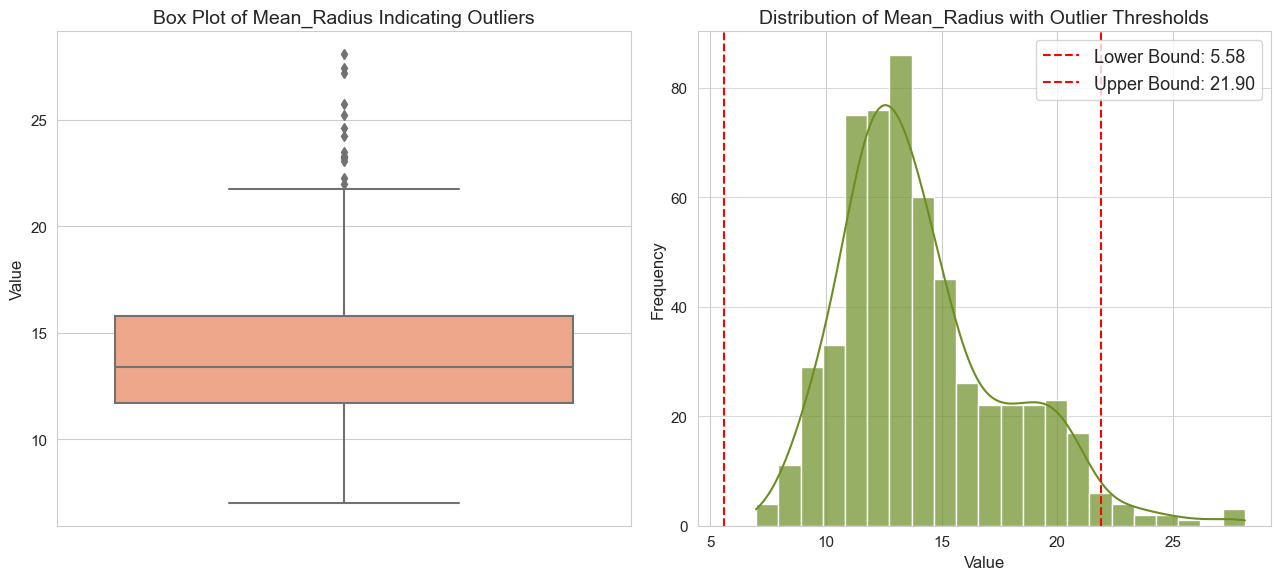


Interpretation: Outliers are data points that significantly deviate from other observations. While they can sometimes indicate errors, they can also represent genuine extreme values, which might hold important information. Their treatment (e.g., removal, transformation, or specific modeling approaches) depends on the context and impact on analysis.
----------------------------------------------------------------------

Outlier Detection for Mean_Texture:
  Total number of identified outliers: 7
  Percentage of data points classified as outliers: 1.23%
  Calculated outlier boundaries: Lower Threshold = 7.7250, Upper Threshold = 30.2450
  Specific outlier values found:
[32.47 33.81 39.28 33.56 31.12 30.72 30.62]


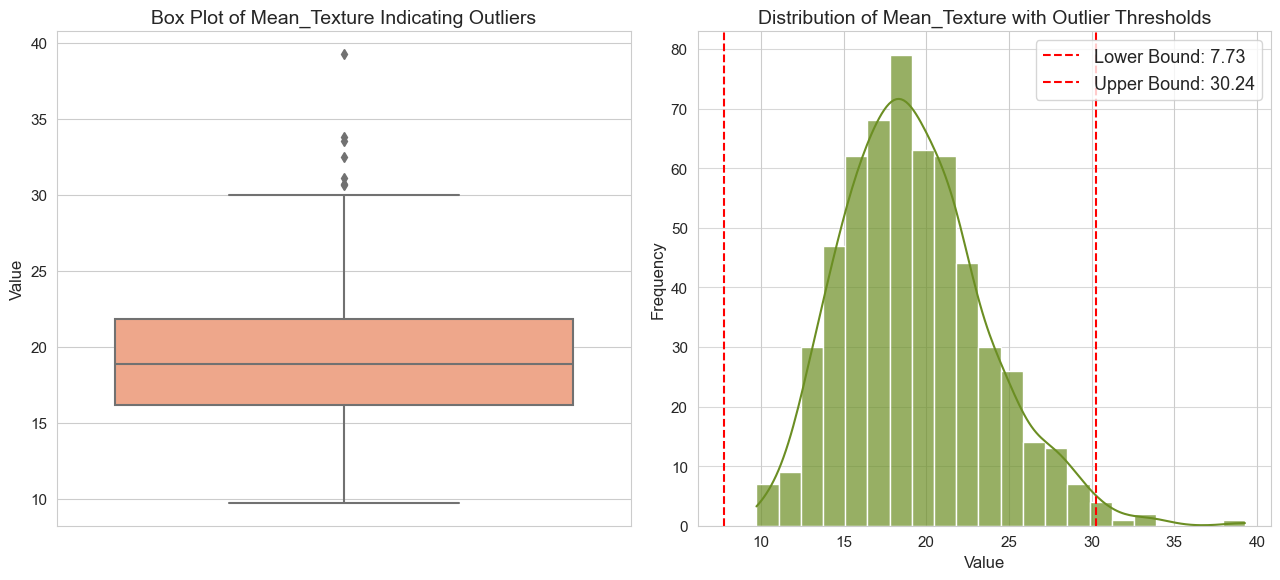


Interpretation: Outliers are data points that significantly deviate from other observations. While they can sometimes indicate errors, they can also represent genuine extreme values, which might hold important information. Their treatment (e.g., removal, transformation, or specific modeling approaches) depends on the context and impact on analysis.
----------------------------------------------------------------------

Outlier Detection for Mean_Perimeter:
  Total number of identified outliers: 13
  Percentage of data points classified as outliers: 2.28%
  Calculated outlier boundaries: Lower Threshold = 31.7750, Upper Threshold = 147.4950
  Specific outlier values found:
[171.5 152.8 166.2 152.1 182.1 158.9 188.5 153.5 155.1 174.2 186.9 152.1
 165.5]


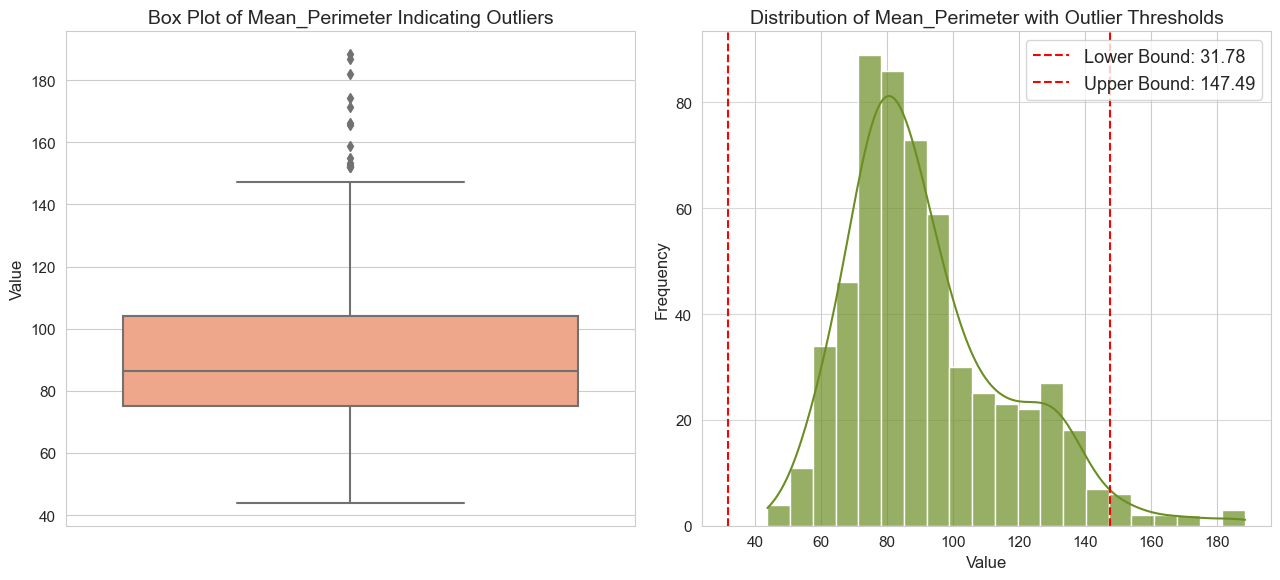


Interpretation: Outliers are data points that significantly deviate from other observations. While they can sometimes indicate errors, they can also represent genuine extreme values, which might hold important information. Their treatment (e.g., removal, transformation, or specific modeling approaches) depends on the context and impact on analysis.
----------------------------------------------------------------------

Outlier Detection for Mean_Area:
  Total number of identified outliers: 25
  Percentage of data points classified as outliers: 4.39%
  Calculated outlier boundaries: Lower Threshold = -123.3000, Upper Threshold = 1326.3000
  Specific outlier values found:
[1404. 1878. 1509. 1761. 1686. 2250. 1685. 2499. 1670. 1364. 1419. 1491.
 1747. 2010. 1546. 1482. 1386. 1335. 1407. 1384. 2501. 1682. 1841. 1347.
 1479.]


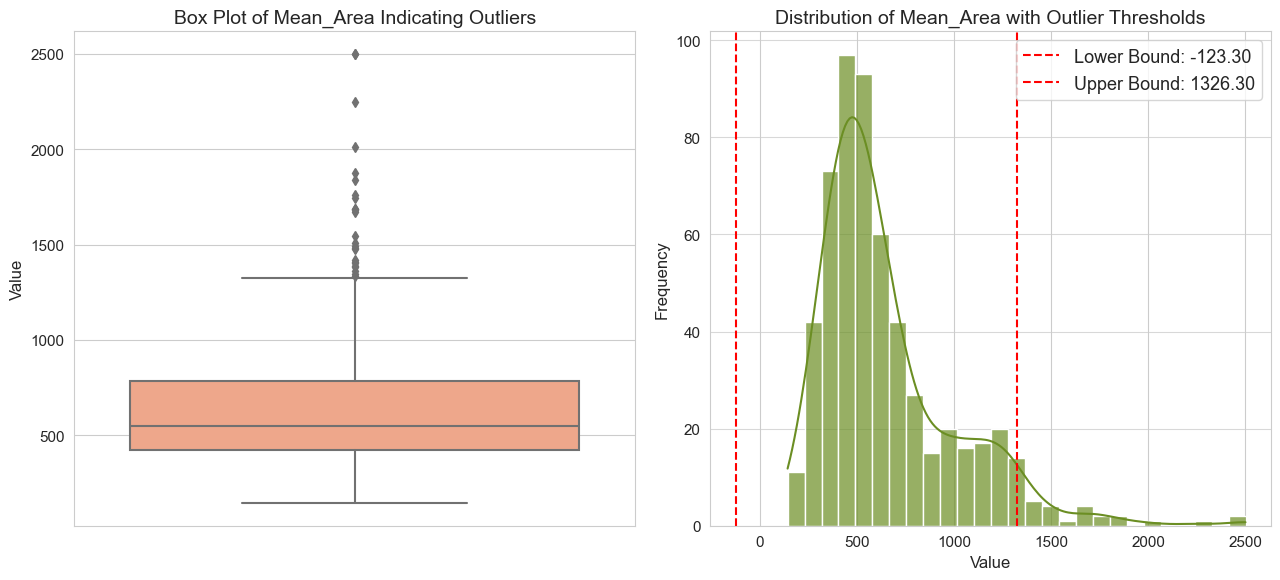


Interpretation: Outliers are data points that significantly deviate from other observations. While they can sometimes indicate errors, they can also represent genuine extreme values, which might hold important information. Their treatment (e.g., removal, transformation, or specific modeling approaches) depends on the context and impact on analysis.
----------------------------------------------------------------------

Outlier Detection for Mean_Smoothness:
  Total number of identified outliers: 6
  Percentage of data points classified as outliers: 1.05%
  Calculated outlier boundaries: Lower Threshold = 0.0580, Upper Threshold = 0.1337
  Specific outlier values found:
[0.1425  0.1398  0.1447  0.1634  0.1371  0.05263]


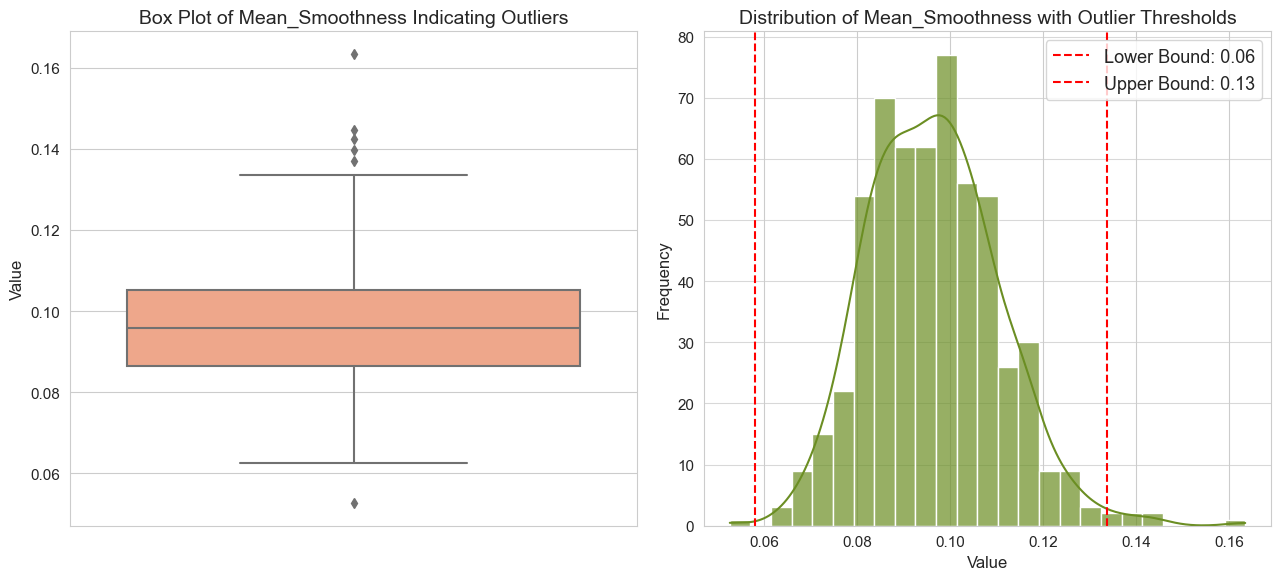


Interpretation: Outliers are data points that significantly deviate from other observations. While they can sometimes indicate errors, they can also represent genuine extreme values, which might hold important information. Their treatment (e.g., removal, transformation, or specific modeling approaches) depends on the context and impact on analysis.
----------------------------------------------------------------------



In [15]:
# Function to identify and visualize outliers using the IQR method
def pinpoint_outliers(data_frame, attribute_name):
    """Identifies and visualizes outliers in an attribute using the Interquartile Range (IQR) method."""
    attribute_values = data_frame[attribute_name].dropna() # Drop NaNs

    if attribute_values.empty:
        print(f"Warning: No data available for {attribute_name} after dropping NaNs. Skipping outlier detection.")
        return

    # Calculating the first quartile (Q1) and third quartile (Q3)
    q1_val = attribute_values.quantile(0.25)
    q3_val = attribute_values.quantile(0.75)
    iqr_val = q3_val - q1_val

    # Defining outlier detection thresholds (1.5 * IQR rule)
    lower_outlier_boundary = q1_val - 1.5 * iqr_val
    upper_outlier_boundary = q3_val + 1.5 * iqr_val

    # Identifying data points that fall outside these boundaries
    identified_outliers = attribute_values[(attribute_values < lower_outlier_boundary) | (attribute_values > upper_outlier_boundary)]

    print(f"Outlier Detection for {attribute_name}:")
    print(f"  Total number of identified outliers: {len(identified_outliers)}")
    print(f"  Percentage of data points classified as outliers: {(len(identified_outliers) / len(attribute_values)) * 100:.2f}%")
    print(f"  Calculated outlier boundaries: Lower Threshold = {lower_outlier_boundary:.4f}, Upper Threshold = {upper_outlier_boundary:.4f}")

    if len(identified_outliers) > 0:
        print("  Specific outlier values found:")
        print(identified_outliers.values)

    # Visualizing outliers using a box plot and histogram with boundaries
    plt.figure(figsize=(13, 6))

    plt.subplot(1, 2, 1) # Box plot to visually represent outliers
    sns.boxplot(y=attribute_values, color='lightsalmon')
    plt.title(f'Box Plot of {attribute_name} Indicating Outliers', fontsize=14)
    plt.ylabel('Value', fontsize=12)
    plt.xticks(fontsize=11)
    plt.yticks(fontsize=11)

    plt.subplot(1, 2, 2) # Histogram with outlier boundaries marked
    sns.histplot(attribute_values, kde=True, color='olivedrab', alpha=0.7)
    plt.axvline(lower_outlier_boundary, color='red', linestyle='--', label=f'Lower Bound: {lower_outlier_boundary:.2f}')
    plt.axvline(upper_outlier_boundary, color='red', linestyle='--', label=f'Upper Bound: {upper_outlier_boundary:.2f}')
    plt.title(f'Distribution of {attribute_name} with Outlier Thresholds', fontsize=14)
    plt.xlabel('Value', fontsize=12)
    plt.ylabel('Frequency', fontsize=12)
    plt.legend()
    plt.grid(axis='y', alpha=0.75)
    plt.xticks(fontsize=11)
    plt.yticks(fontsize=11)

    plt.tight_layout()
    plt.show()

    print("\nInterpretation: Outliers are data points that significantly deviate from other observations. While they can sometimes indicate errors, they can also represent genuine extreme values, which might hold important information. Their treatment (e.g., removal, transformation, or specific modeling approaches) depends on the context and impact on analysis.\n" + "-"*70 + "\n")

    # Returning the identified outliers for further action
    return identified_outliers

# Applying outlier detection for all selected attributes
for attribute in key_numerical_attributes:
    attribute_outliers = pinpoint_outliers(medical_data, attribute)

## Conclusion

This comprehensive statistical analysis and data visualization notebook has provided valuable insights into the Wisconsin Breast Cancer Dataset. We explored central tendencies, measures of dispersion, and feature relationships, particularly distinguishing between benign and malignant diagnoses. Understanding these foundational statistical properties is crucial for subsequent machine learning tasks, such as feature selection and model building.